# Featurization, Model Selection & Tuning Project: Modeling of strength of high performance concrete

# 1. Import the necessary libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder
#Build the model with the best hyper parameters
from sklearn.model_selection import cross_val_score
#importing the zscore for scaling
from scipy.stats import zscore
#Importing PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA
# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 
# Import Support Vector Classifier machine learning library
from sklearn.svm import SVC
#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
# Import the metrics
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# 2. Read the data as a data frame (Data - concrete.csv)

In [2]:
# Read the data into Data Frame
# Head returns the first 5 rows of the dataframe to have initial glance at the data and review the data format
data=pd.read_csv("concrete.csv")
data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [3]:
data.tail()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

# 3. Exploratory Data Analysis

# a. Shape of the data

In [4]:
# Shape of the data: Print the number of rows and columns to give dimensions of the data
data.shape

(1030, 9)

# b. Data Information 

In [5]:
# Data Info: Print the information on data type and presence of null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Attribute Information:    
    
**ATTRIBUTES**    
    
Name -- Data Type -- Measurement -- Description

1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable     
2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable    
3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable    
4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable    
5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable    
6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable    
7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable    
8. Age -- quantitative -- Day (1~365) -- Input Variable    
9. Concrete compressive strength -- quantitative -- MPa -- Target Variable    

The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.    

# c. Data Columns and Description

In [6]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
# Describe the data to understand the attributes and their statistical properties
data.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [8]:
#finding unique data
data.apply(lambda x: len(x.unique()))

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

#### Analysis
1. It shows that there are eight independent variables (cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one target variable (strength).

2. All the records are numeric.

3. **strength** is the target variable. This is the regression problem and output variable is the concrete compression strength. 

4. slag, ash and superplastic have multiple values as zero. These are optional ingredients and cement may not have these so value of zero is valid value and need not be treated as missing value.

5. water, superplastic, coarseagg, fineagg have mean similar as median.

6. cement, slag, ash, age have mean greater than the median and approx. right skewed distribution.

# d. Checking the presence of missing values 

In [9]:
# Presence of missing values using isnull function
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [10]:
data.isnull().values.any()

False

#### Analysis
There is no presence of missing value.

# e. Data Distribution of all attributes

### Univariate Analysis: Plot the columns to visually understand the distribution of the data

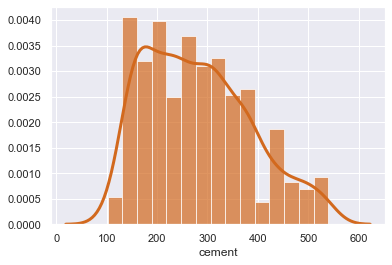

In [11]:
# CEMENT 
sns.distplot(data['cement'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="chocolate")
plt.show()

Text(0.7, 281.1, 'IQR')

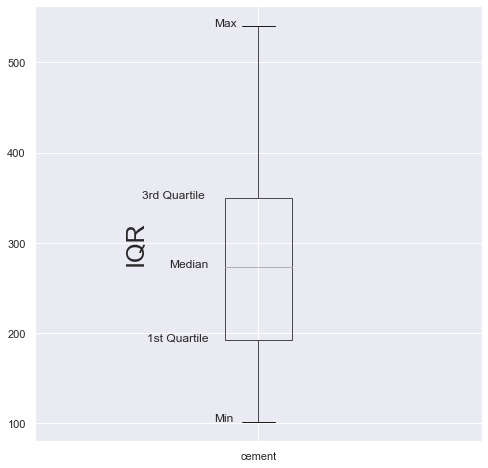

In [12]:
data.boxplot(column="cement",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=350.00, s="3rd Quartile")
plt.text(x=0.8, y=273.00, s="Median")
plt.text(x=0.75, y=192.00, s="1st Quartile")
plt.text(x=0.9, y=102.00, s="Min")
plt.text(x=0.9, y=540.00, s="Max")
plt.text(x=0.7, y=281.10, s="IQR", rotation=90, size=25)

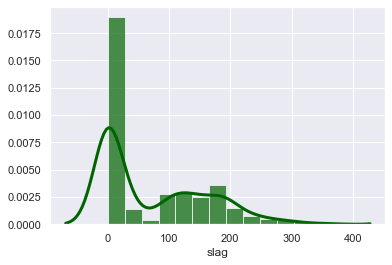

In [13]:
# BLAST FURNACE SLAG  
sns.distplot(data['slag'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="darkgreen")
plt.show()

Text(0.7, 74.0, 'IQR')

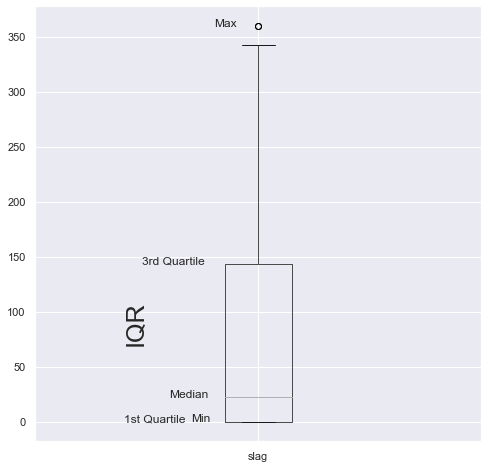

In [14]:
data.boxplot(column="slag",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=143.00, s="3rd Quartile")
plt.text(x=0.8, y=22.00, s="Median")
plt.text(x=0.7, y=0.00, s="1st Quartile")
plt.text(x=0.85, y=0.00, s="Min")
plt.text(x=0.9, y=359.40, s="Max")
plt.text(x=0.7, y=74.00, s="IQR", rotation=90, size=25)

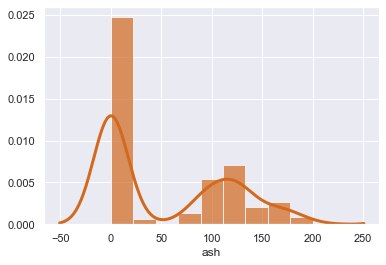

In [15]:
# FLY ASH 
sns.distplot(data['ash'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="chocolate")
plt.show()

Text(0.7, 54.1, 'IQR')

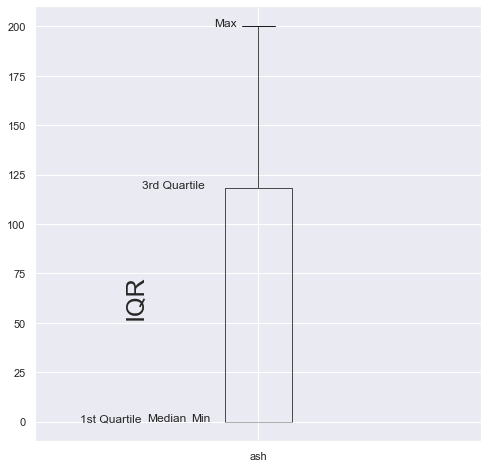

In [16]:
data.boxplot(column="ash",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=118.30, s="3rd Quartile")
plt.text(x=0.75, y=0.00, s="Median")
plt.text(x=0.6, y=0.00, s="1st Quartile")
plt.text(x=0.85, y=0.00, s="Min")
plt.text(x=0.9, y=200.00, s="Max")
plt.text(x=0.7, y=54.10, s="IQR", rotation=90, size=25)

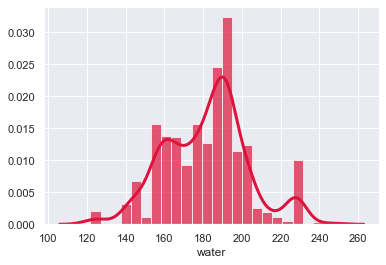

In [17]:
# WATER 
sns.distplot(data['water'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="crimson")
plt.show()

Text(0.7, 181.5, 'IQR')

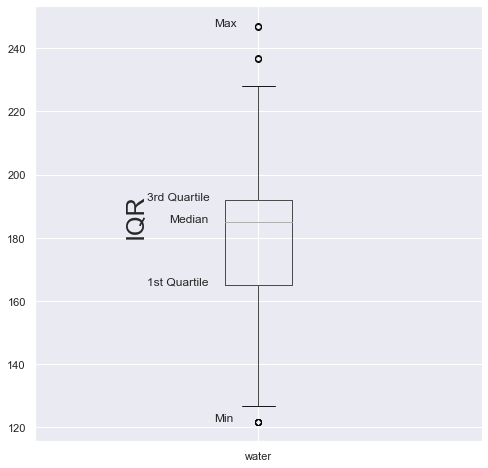

In [18]:
data.boxplot(column="water",return_type='axes',figsize=(8,8))

plt.text(x=0.75, y=192.00, s="3rd Quartile")
plt.text(x=0.8, y=185.00, s="Median")
plt.text(x=0.75, y=165.00, s="1st Quartile")
plt.text(x=0.9, y=121.80, s="Min")
plt.text(x=0.9, y=247.00, s="Max")
plt.text(x=0.7, y=181.50, s="IQR", rotation=90, size=25)

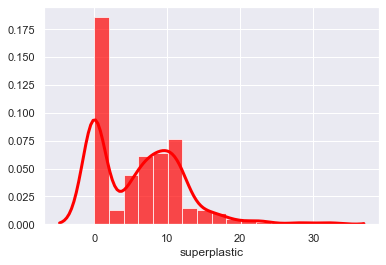

In [19]:
# SUPERPLASTICIZER  
sns.distplot(data['superplastic'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="red")
plt.show()

Text(0.7, 6.2, 'IQR')

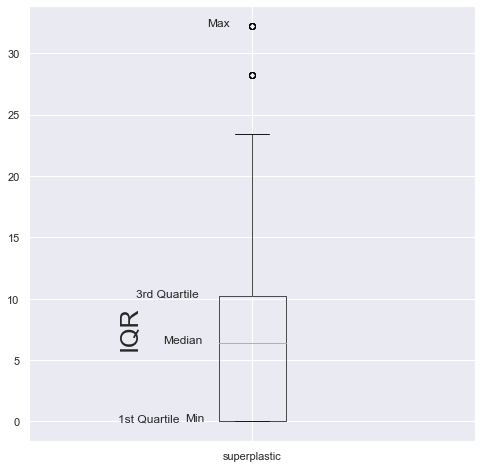

In [20]:
data.boxplot(column="superplastic",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=10.20, s="3rd Quartile")
plt.text(x=0.8, y=6.40, s="Median")
plt.text(x=0.7, y=0.00, s="1st Quartile")
plt.text(x=0.85, y=0.00, s="Min")
plt.text(x=0.9, y=32.20, s="Max")
plt.text(x=0.7, y=6.20, s="IQR", rotation=90, size=25)

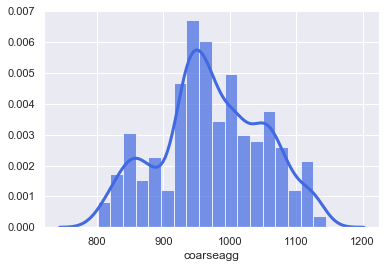

In [21]:
# COARSE AGGREGATE 
sns.distplot(data['coarseagg'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="royalblue")
plt.show()

Text(0.7, 973.0, 'IQR')

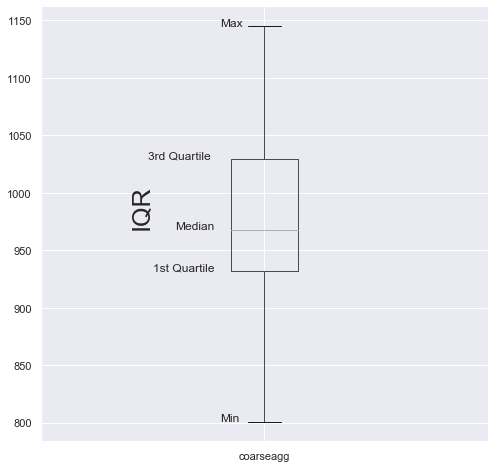

In [22]:
data.boxplot(column="coarseagg",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=1029.40, s="3rd Quartile")
plt.text(x=0.8, y=968.00, s="Median")
plt.text(x=0.75, y=932.00, s="1st Quartile")
plt.text(x=0.9, y=801.00, s="Min")
plt.text(x=0.9, y=1145.00, s="Max")
plt.text(x=0.7, y=973.00, s="IQR", rotation=90, size=25)

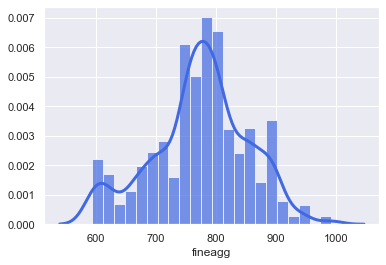

In [23]:
# FINE AGGREGATE 
sns.distplot(data['fineagg'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="royalblue")
plt.show()

Text(0.7, 773.5, 'IQR')

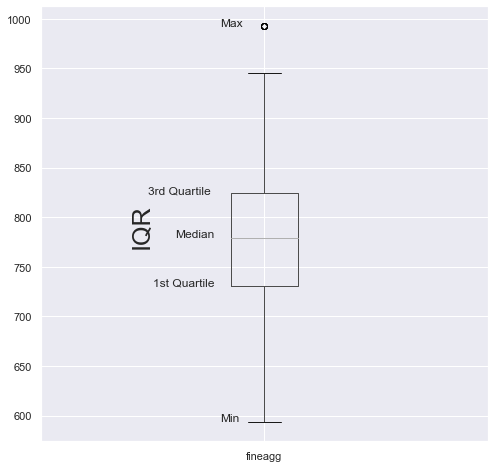

In [24]:
data.boxplot(column="fineagg",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=824.00, s="3rd Quartile")
plt.text(x=0.8, y=779.50, s="Median")
plt.text(x=0.75, y=730.95, s="1st Quartile")
plt.text(x=0.9, y=594.00, s="Min")
plt.text(x=0.9, y=992.60, s="Max")
plt.text(x=0.7, y=773.50, s="IQR", rotation=90, size=25)

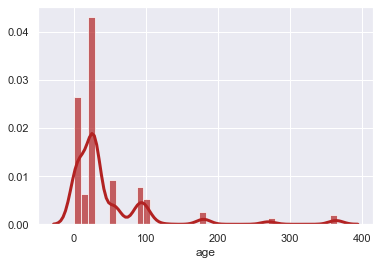

In [25]:
# AGE 
sns.distplot(data['age'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="firebrick")
plt.show()

Text(0.7, 45.6, 'IQR')

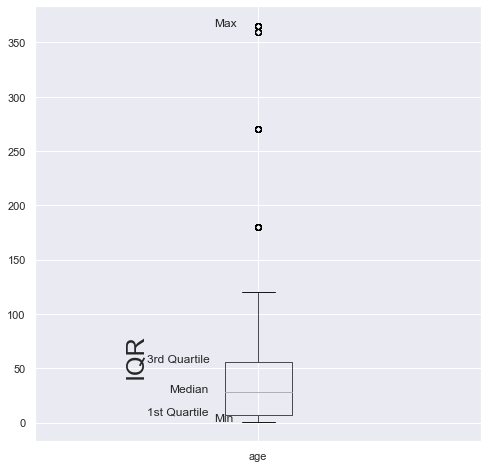

In [26]:
data.boxplot(column="age",return_type='axes',figsize=(8,8))

plt.text(x=0.75, y=56.00, s="3rd Quartile")
plt.text(x=0.8, y=28.00, s="Median")
plt.text(x=0.75, y=7.00, s="1st Quartile")
plt.text(x=0.9, y=1.00, s="Min")
plt.text(x=0.9, y=365.00, s="Max")
plt.text(x=0.7, y=45.60, s="IQR", rotation=90, size=25)

In [27]:
# Print the measure of skewness
data.skew(axis=0).sort_values(ascending=False)

age             3.269177
superplastic    0.907203
slag            0.800717
ash             0.537354
cement          0.509481
strength        0.416977
water           0.074628
coarseagg      -0.040220
fineagg        -0.253010
dtype: float64

#### Analysis

**Analysis from the plots and skewness measurements:**     

*Variables which are **highly skewed** and have presence of outliers*    
age  
superplastic    
slag    
     
*Variables which are **moderately skewed** with few outliers*    
ash    
cement    

*Variables which are **fairly symmetrical** with none and small presence of outliers*    
water     
fineagg     
coarseagg    

**Observation**

We can see observe that :

1. cement is almost normal.
2. slag has three gausssians and rightly skewed.
3. ash has two gaussians and rightly skewed.
4. water has three guassians and just slighly left skewed.
5. superplastic has two gaussians and rightly skewed.
6. coarseagg has three guassians and almost normal.
7. fineagg has almost two guassians and looks like normal.
8. age has multiple guassians and rightly skewed.

### Target Variable Analysis: strength (Cement Compressive Strength measured in MPa)

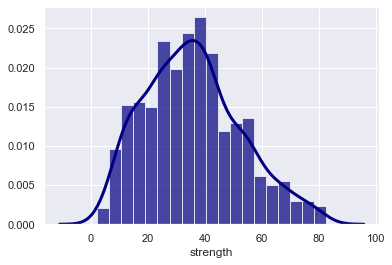

In [28]:
# STRENGTH - Concrete compressive strength 
sns.distplot(data['strength'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="navy")
plt.show()

#### Analysis
**Target Variable - "strength"**  
The variable is fairly symmetrical with skewness of less than 0.5.

## Bivariate / Multivariate Analysis

### Pairplot and HeatMap to find the correlation

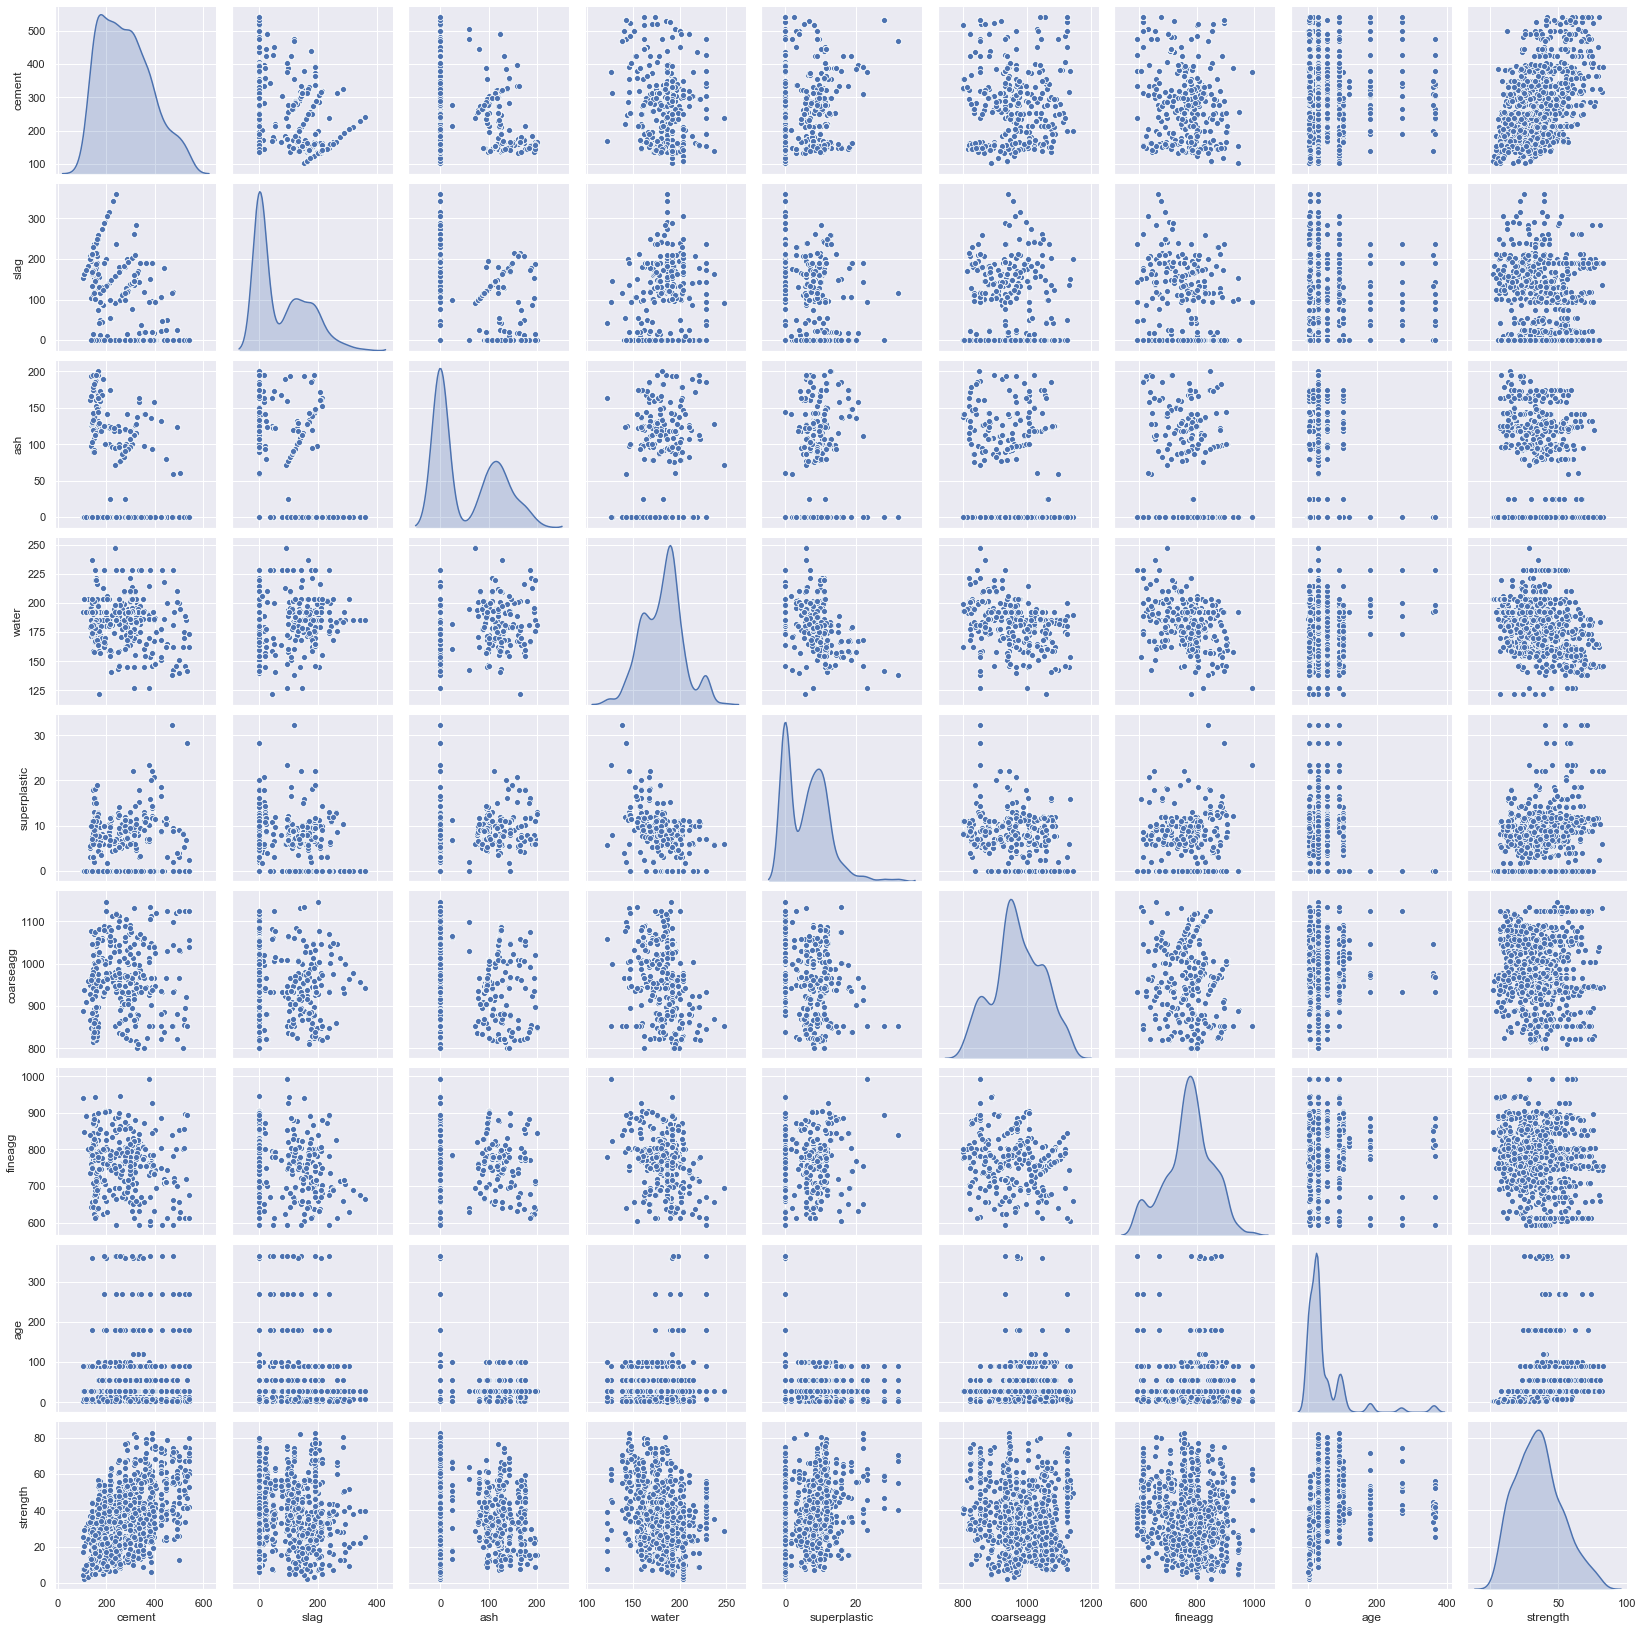

In [29]:
sns.pairplot(data,diag_kind="kde")

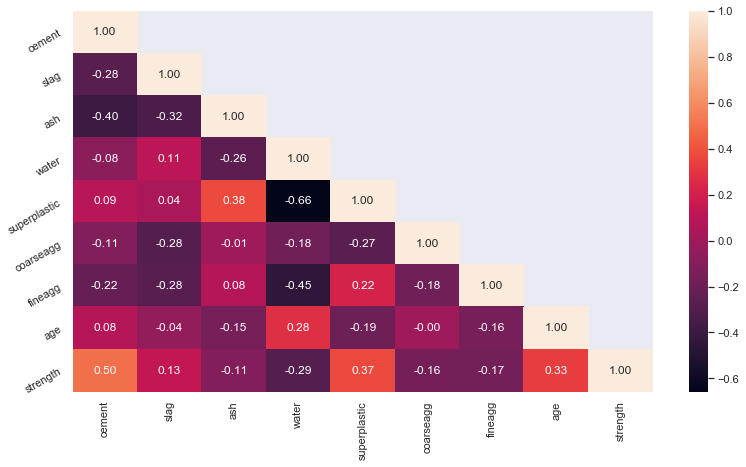

In [30]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [31]:
# "Strength" correlation values in descending order
correlation_values=data.corr()['strength']
correlation_values.abs().sort_values(ascending=False)

strength        1.000000
cement          0.497832
superplastic    0.366079
age             0.328873
water           0.289633
fineagg         0.167241
coarseagg       0.164935
slag            0.134829
ash             0.105755
Name: strength, dtype: float64

#### Analysis     
    
1. cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
2. slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
3. ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
4. water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
5. superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
6. coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
7. fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

**Relationship with Target Variable:**
1. strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Hence Cement though it has positive relationship with the strength, it is not a very good predictor. It is a weak predictor with correlation of just less than 0.5. 
2. strength vs slag: There is no particular trend. strength vs water: There is also no particular trend. 
3. strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor. 
4. strength vs superplastic:For a given value of superplastic, we have different values of strength. Hence, It is not a good predictor. 
5. Other attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. 

### Analysis of the Target Variable vs Other variables

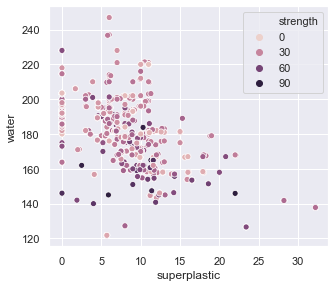

In [32]:
plt.figure(figsize=(5,15))

plt.subplot(3,1,1)
sns.scatterplot(data['superplastic'], data['water'], hue = data['strength'])

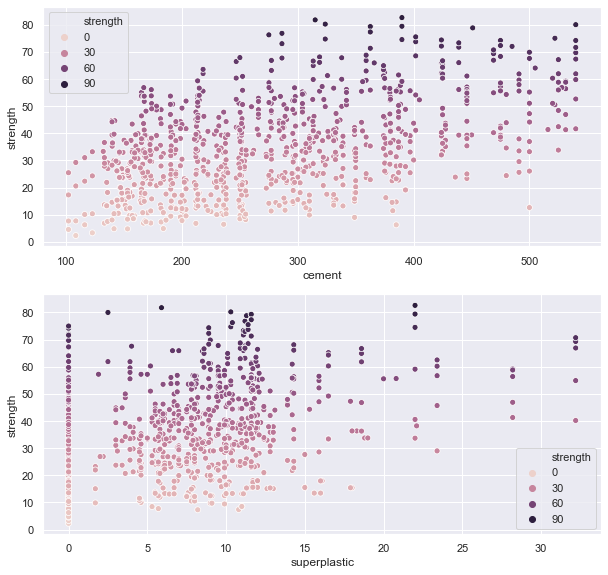

In [33]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.scatterplot(data['cement'], data['strength'], hue = data['strength'])

plt.subplot(3,1,2)
sns.scatterplot(data['superplastic'], data['strength'], hue = data['strength'])

#### Analysis
1. From above plot between water and superplastic, we can observe the negative correlation but it does not seem to be strong relationas there is a cloud between values of superplastic as 5-13.
2. As observed in Pair Plot and Correlation, the plot between cement and strength shows the weak postive relation.
3. Relation between strength and superplastic is very weak and their is concentration of cloud between values 5 to 13

### Handling Outliers

In [34]:
# get the z-score of every value for the respective column
# z-score greater than 3 or less than -3 is generally taken as outlier in the data
import scipy.stats as stats
upperthreshold = 3 
lowerthreshold = -3 
z = np.abs(stats.zscore(data))
print('Z Score greater than 3 :', np.where(z>upperthreshold))
print('Z Score lesser than -3 :', np.where(z<lowerthreshold))

Z Score greater than 3 : (array([  21,   44,   64,   66,  133,  149,  156,  157,  159,  198,  232,
        256,  262,  263,  270,  292,  297,  313,  323,  361,  393,  448,
        465,  484,  538,  564,  570,  601,  623,  632,  713,  720,  744,
        754,  755,  816,  838,  850,  878,  901,  918,  919,  951,  955,
        957,  990,  995, 1026, 1028], dtype=int64), array([1, 4, 7, 3, 7, 7, 4, 7, 7, 7, 4, 7, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7,
       7, 7, 4, 1, 7, 7, 7, 7, 7, 7, 4, 7, 7, 4, 4, 7, 7, 7, 1, 7, 7, 4,
       7, 1, 7, 4, 7], dtype=int64))
Z Score lesser than -3 : (array([], dtype=int64), array([], dtype=int64))


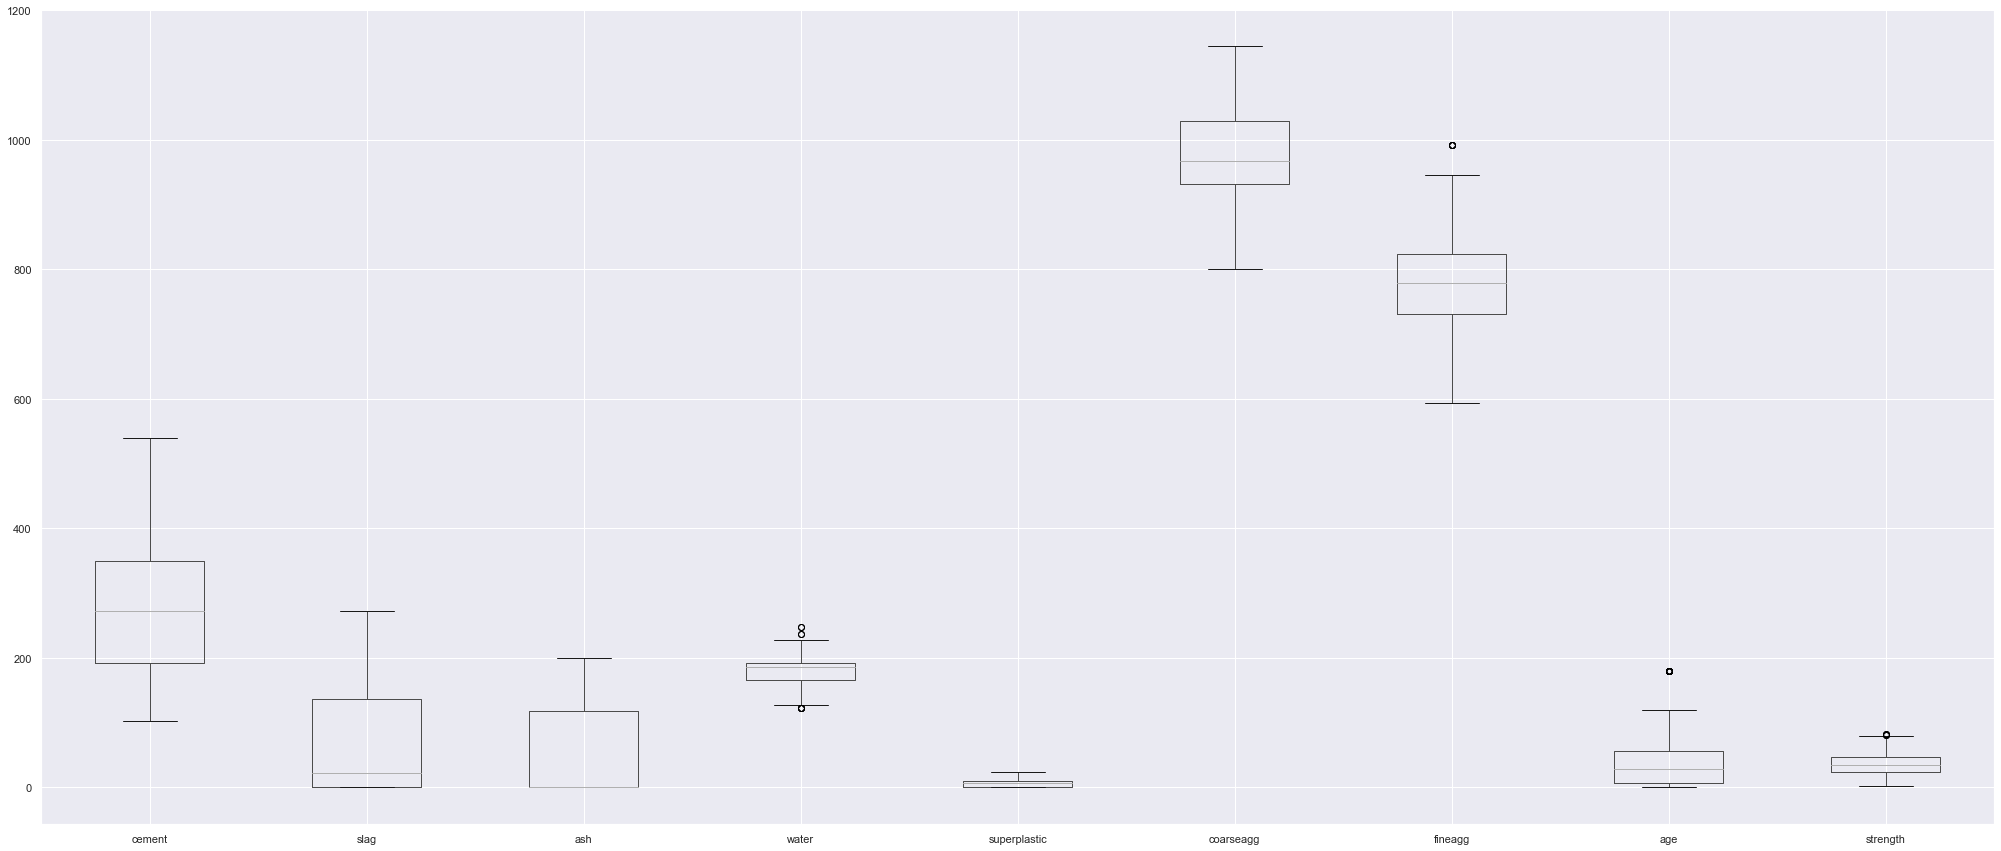

In [35]:
#Handling the outliers
data_corrected=data                                       
#Replacing the outliers by median
median, std = data['slag'].median(), data['slag'].std()  #Get the median and the standard deviation
outliers = (data['slag'] - median).abs() > 3*std
mylist = data.loc[outliers]['slag'].tolist()
for id in mylist:
    data_corrected.loc[data.loc[np.where(data['slag']==id)].index, 'slag'] = median

#Replacing the outliers by 95% percentile value
median, std = data['superplastic'].median(), data['superplastic'].std()  
outliers = (data['superplastic'] - median).abs() > 3*std
value = np.percentile(data['superplastic'],95)
mylist = data.loc[outliers]['superplastic'].tolist()
for id in mylist:
    data_corrected.loc[data.loc[np.where(data['superplastic']==id)].index, 'superplastic'] = value

median, std = data['age'].median(), data['age'].std()  
outliers = (data['age'] - median).abs() > 3*std
value = np.percentile(data['age'],95)                   #Get the 95 percentile value
mylist = data.loc[outliers]['age'].tolist()
for id in mylist:
    data_corrected.loc[data.loc[np.where(data['age']==id)].index, 'age'] = value

data_corrected.boxplot(figsize=(35,15))

In [36]:
data_corrected.skew().sort_values(ascending=False)

age             1.876518
slag            0.713034
ash             0.537354
cement          0.509481
superplastic    0.453405
strength        0.416977
water           0.074628
coarseagg      -0.040220
fineagg        -0.253010
dtype: float64

#### Analysis     
    
Outliers have been detected using the Z-Score. Z-Score of 3 is kept as threshold. We have replaced the outliers with median value for 'slag' as outliers were not very far from the maximum value.

For 'age' and 'superplastic', we have used 95 percentile value as standard deviation is very high and large difference between maximum and 75 percentile value.

We can observe that skewness of data has improved significantly after removing the outliers.    

In [37]:
#Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) 
#and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain 
#applications.

#Binning compressive strength in 3 categories.
#category 1 - mpa less than 17.
#category 2 - mpa in between 17 to 28.
#category 3 - mpa greater than 28.

concrete_df = data_corrected.copy(deep=False)
def lab(data2):
    if data2["strength"] <= 17:
        return "1"
    if data2["strength"] >17 and data2["strength"] <= 28 :
        return "2"
    if data2["strength"] >28 :
        return "3 "
    
concrete_df["strength_category"] = concrete_df.apply(lambda concrete_df:lab(concrete_df) ,axis =1)

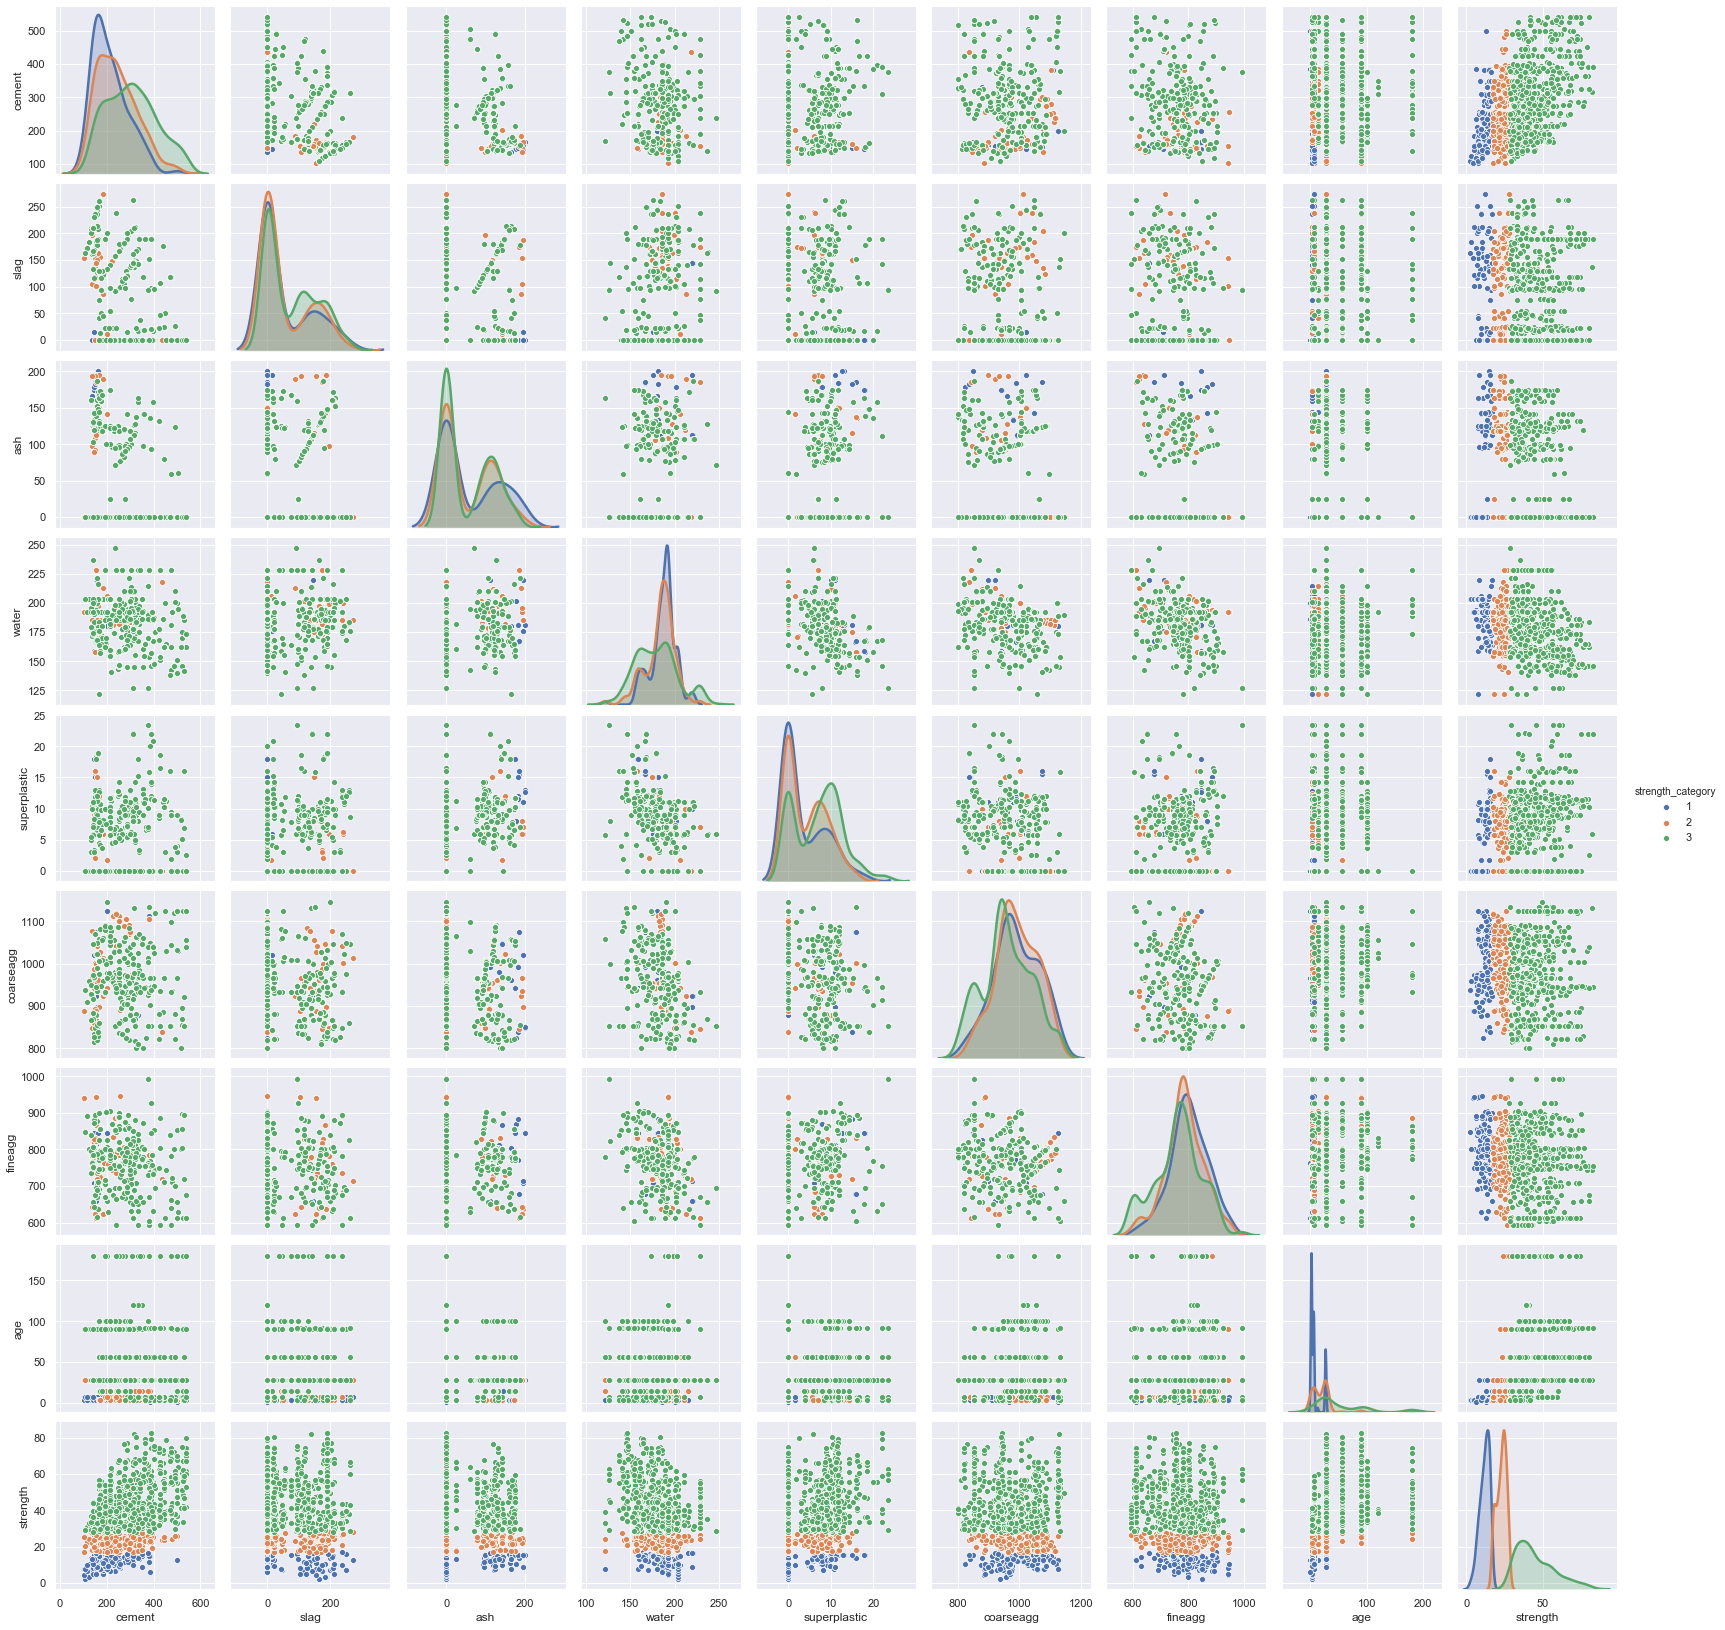

In [38]:
sns.pairplot(concrete_df, diag_kind='kde',hue='strength_category')

In [39]:
concrete_df["strength_category"].value_counts()

3     669
2     213
1     148
Name: strength_category, dtype: int64

#### Analysis     
    
Performing the Pair Plot again along with the category variable as hue to observe the distribution for different categories of strength.     
     
For all the variables except age, we can strength is distributed across the whole length of distribution. For age, interestingly we can observe that as age is increases beyond a certain period, the strength category "3" becomes most prevalent.

From above, we can also see that there is **class imbalance in the data, almost 65% of data is for category "3"**.

In [40]:
concrete_df1 = data_corrected.copy(deep=True)
def label(data):
    if data["age"] <= 30:
        return "1"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11"
    if data["age"] > 330 :
        return "12"
concrete_df1["age_months"] = concrete_df1.apply(lambda concrete_df1:label(concrete_df1) , axis=1)

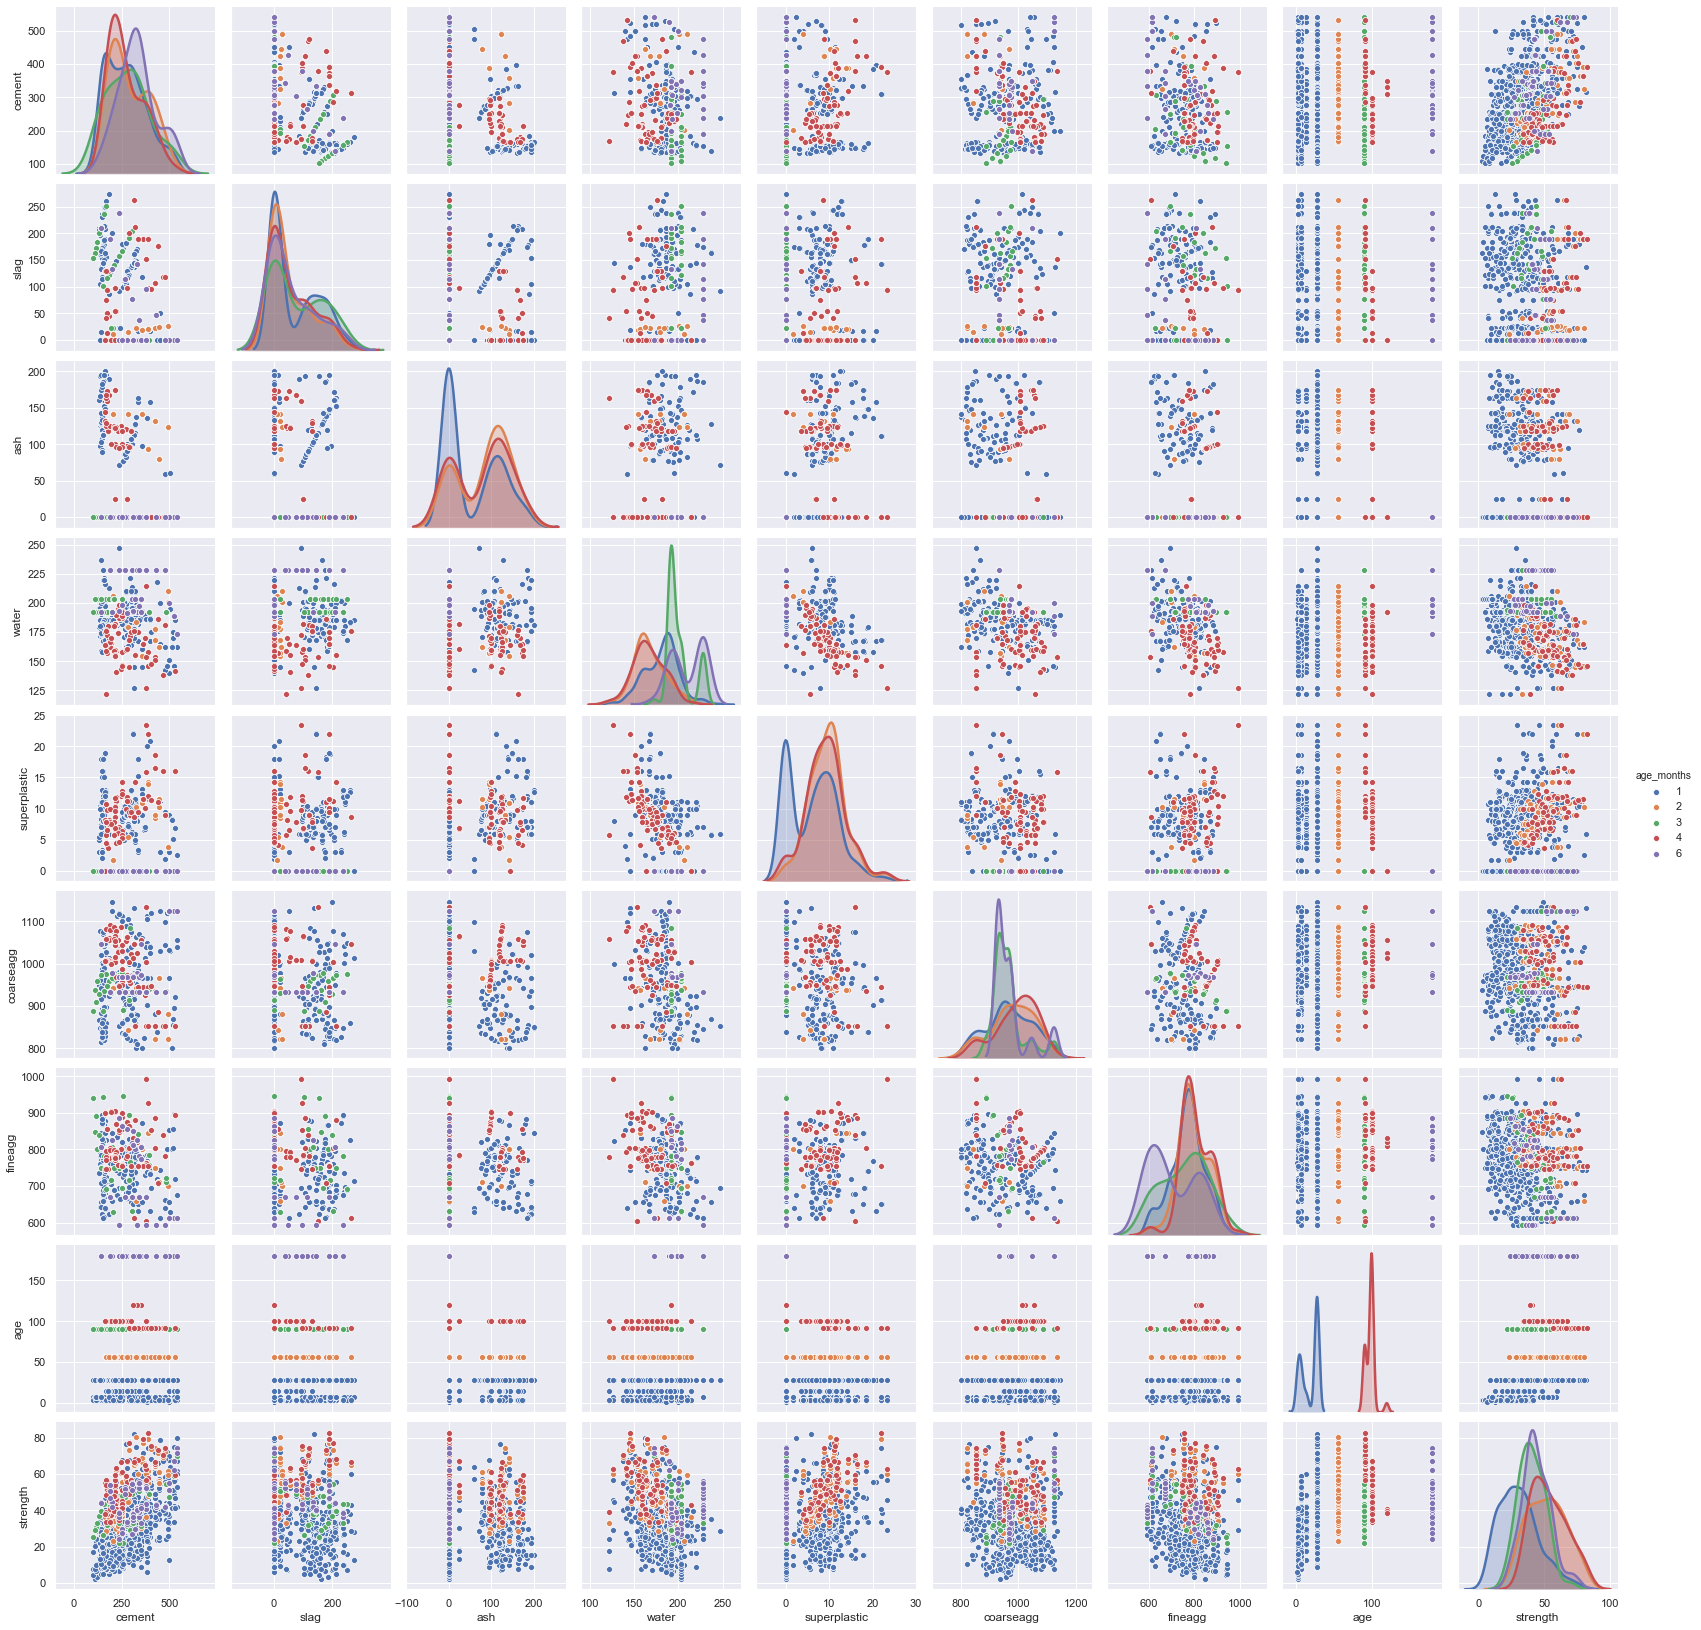

In [41]:
sns.pairplot(concrete_df1, diag_kind='kde',hue='age_months')

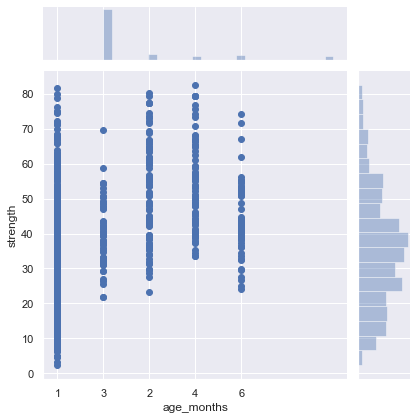

In [42]:
sns.jointplot(concrete_df1['age_months'],concrete_df1['strength'])

### Analysis

Age is randomly distributed across the independent variables. We can from the pair plot, as was observed in earlier plot as well, strength remains in category "3" beyond the age of 30 months. Strength is disbuted across for age with "30" months. So no correlation can be found with the age. 

## Split the data and Scale the data

In [43]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X = data_corrected.iloc[:,0:8]
y = data_corrected.iloc[:,8]

In [44]:
#Scaling the features
from sklearn import preprocessing
data_scaled = preprocessing.scale(data_corrected)
X_scaled = preprocessing.scale(X)

In [45]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 234)

from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
y_train = preprocessing.scale(y_train)
y_test = preprocessing.scale(y_test)

## DecisionTree Regression

In [46]:
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X.columns))

Feature importances: 
                    Imp
cement        0.349372
slag          0.100943
ash           0.013279
water         0.075155
superplastic  0.099082
coarseagg     0.027603
fineagg       0.021646
age           0.312920


### Analysis

As evident from above; cement, age and water are significant attributes.
Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable. These will impact less to the strength variable. The same analysis was inferred from pair plot as well.

In [48]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9948562271509723
Performance on testing data using DT: 0.7580655375297873
Accuracy DT:  0.7580655375297873
MSE:  0.2419344624702127


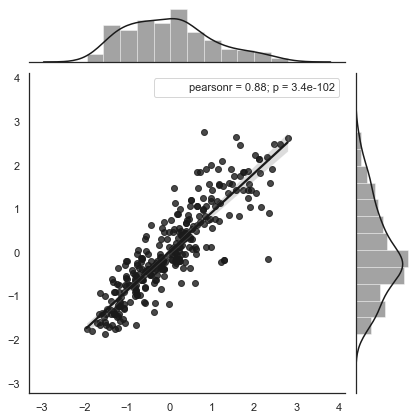

In [49]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Decision Tree  0.758066

### Analysis

The accuracy score of the Decision Tree model on Test Data is ~77%. 

There is a overfitting in the model as the dataset is performing 99% accurately in training data. However, the accuracy on test data drops significantly.

### K fold cross validation

In [51]:
#importing the K fold
from sklearn.model_selection import KFold

num_folds = 12
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8485012373186187
Standard Deviation:  0.06013703778048966


In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1         Decision Tree  0.758066
2  Decision Tree k fold  0.848501

### Iteration 2: Drop the variables

In [53]:
# Drop the variables

XD = X.drop( ['ash','superplastic','fineagg'] , axis=1)

In [54]:
XD_train, XD_test, yd_train, yd_test = train_test_split(XD,y, test_size = 0.3, random_state = 234)
XD_train = preprocessing.scale(XD_train)
XD_test = preprocessing.scale(XD_test)
yd_train = preprocessing.scale(yd_train)
yd_test = preprocessing.scale(yd_test)
dt_model = DecisionTreeRegressor()
dt_model.fit(XD_train , yd_train)
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=XD.columns))

Feature importances: 
                 Imp
cement     0.390689
slag       0.137588
water      0.121077
coarseagg  0.032291
age        0.318356


In [55]:
yd_pred = dt_model.predict(XD_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(XD_train,yd_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(XD_test,yd_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(yd_test, yd_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(yd_test, yd_pred))

Performance on training data using DT: 0.993176613313958
Performance on testing data using DT: 0.6382534127340599
Accuracy DT:  0.6382534127340599
MSE:  0.36174658726594006


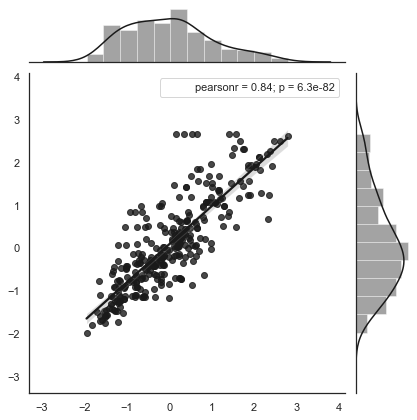

In [56]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=yd_test, y=yd_pred, stat_func=pearsonr,kind="reg", color="k");

In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1         Decision Tree  0.758066
2  Decision Tree k fold  0.848501
3        Decision Tree2  0.638253

### Analysis

The accuracy on testing dataset has not improved and it is still an overfit model with accuracy much higher on training data than the test data.

Actually the accuracy has dropped as compared to model with all variables.

### Iteration 3: With Decision Tree Pruning

In [58]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor(max_depth = 3,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [59]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X.columns))

                   Imp
cement        0.438479
slag          0.000000
ash           0.000000
water         0.051547
superplastic  0.097755
coarseagg     0.000000
fineagg       0.000000
age           0.412219


In [60]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.6292098128056838
Performance on testing data using DT: 0.6031007570222419
Accuracy DT:  0.6031007570222419
MSE:  0.3968992429777581


In [61]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1         Decision Tree  0.758066
2  Decision Tree k fold  0.848501
3        Decision Tree2  0.638253
4  Pruned Decision Tree  0.603101

In [62]:
# K Fold cross validation

num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.5961162096185499
Standard Deviation:  0.08417900207042046


In [63]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                Decision Tree  0.758066
2         Decision Tree k fold  0.848501
3               Decision Tree2  0.638253
4         Pruned Decision Tree  0.603101
5  Pruned Decision Tree k fold  0.596116

### Analysis

With tree pruning, we can observe that the accuracy of the model has reduced to 60%. But the model is no longer overfit with score difference on training and testing data reduced to 2% from more than 20-30% earlier 

### K Means Clustering - to find groups in the data

In [64]:
XScaled = X.apply(zscore)
from sklearn.cluster import KMeans
cluster_range = range( 2, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(XScaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              2     6587.392583
1              3     5631.635376
2              4     4847.293124
3              5     4220.794473
4              6     3767.189526
5              7     3550.262115
6              8     3364.651511
7              9     3193.132558
8             10     3058.219670
9             11     2856.217085
10            12     2690.965405
11            13     2586.545684
12            14     2467.789647

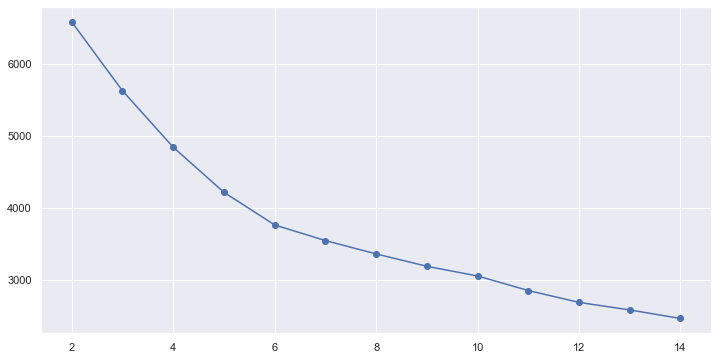

In [65]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [66]:
# The elbow plot confirms our visual analysis that there are likely 8 - 10 good clusters
# Let us try with 8 clusters

In [67]:
#k=9
cluster = KMeans( n_clusters = 9, random_state = 2354 )
cluster.fit(XScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [68]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(XScaled)
XScaled["GROUP"] = prediction
XCopy = X
XCopy["Group"] = prediction
XCopy.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  Group
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0      0
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0      5
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0      5
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0      0
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0      0
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0  90.0      4
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6   7.0      0
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7  56.0      5
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0  28.0      3
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0  28.0      1

In [69]:
centroids = cluster.cluster_centers_
centroids

array([[-8.52019582e-01,  1.27402476e+00, -8.24446664e-01,
         6.07067747e-01, -8.56046742e-01,  2.09541301e-02,
         2.38798925e-03, -3.16710900e-01],
       [-4.04173836e-01,  2.85530700e-01,  1.08871781e+00,
         5.74733474e-01,  4.34018261e-01, -1.20632569e+00,
        -3.47481954e-01, -3.08765691e-01],
       [ 1.45844832e+00, -1.08057279e-01, -3.15954564e-01,
        -1.26763881e+00,  1.32375611e+00, -9.90306885e-01,
         7.72258865e-01, -2.11414181e-01],
       [ 3.46371789e-01, -8.29229179e-01, -8.47143932e-01,
         3.93072108e-01, -1.04769190e+00,  5.26038717e-01,
         1.22517487e-01, -5.50899243e-01],
       [ 5.46280798e-02, -6.22374712e-01, -6.94921694e-01,
         5.54819198e-01, -9.55847247e-01,  1.24593325e-01,
         6.66532631e-01,  2.05204730e+00],
       [-5.95348466e-01, -6.46646692e-01,  1.15461034e+00,
        -6.43374856e-01,  4.64861882e-01,  5.92844998e-01,
         3.97590586e-01, -8.12792402e-02],
       [ 3.70123631e-01,  1.351109

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F766A45AC8>,
      dtype=object)

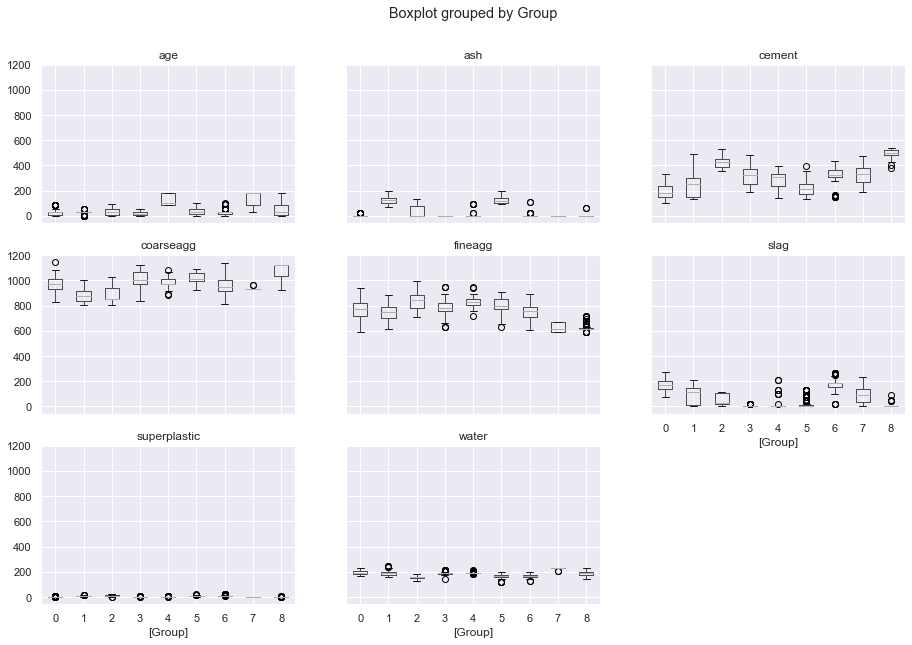

In [70]:
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
XCopy.boxplot(by = 'Group',  layout=(3,3), figsize=(15, 10))

### Analysis

1. In K Means Custering, we can find the clusters in different variables. But can not see any distinct characteristics of these clusters which can help to cut the data intro groups and do further group data analysis and run separate models on them. We can see that age has groups but the data is overlapping in them.

### Linear Regression, Ridge & LASSO Models

In [71]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X = data_corrected.iloc[:,0:8]
y = data_corrected[['strength']]

In [72]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 234)

#from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = preprocessing.scale(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = preprocessing.scale(y_train)
y_train = pd.DataFrame(y_train, columns=y.columns)
y_test = preprocessing.scale(y_test)
y_test = pd.DataFrame(y_test, columns=y.columns)

In [73]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [74]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.540130865328806
The coefficient for slag is 0.3205084524819329
The coefficient for ash is 0.15840043653311814
The coefficient for water is -0.36674224958251983
The coefficient for superplastic is 0.1004401299572302
The coefficient for coarseagg is -0.06297226972626652
The coefficient for fineagg is -0.12525433658392884
The coefficient for age is 0.5217290492689047


In [75]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.848050154077548e-16


In [76]:
y_pred = regression_model.predict(X_test)
# performance on train data
print('Performance on training data using LR:',regression_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using LR:',regression_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_LR=metrics.r2_score(y_test, y_pred)
print('Accuracy LR: ',acc_LR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using LR: 0.683051582284457
Performance on testing data using LR: 0.6406327566332138
Accuracy LR:  0.6406327566332138
MSE:  0.3593672433667861


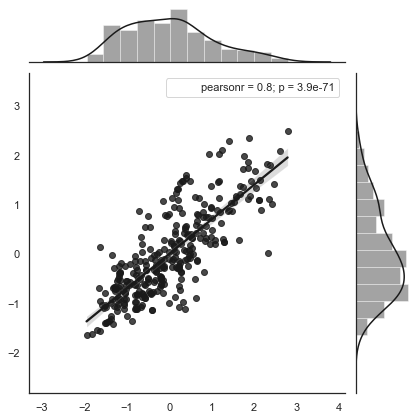

In [77]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [78]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': acc_LR},index={'1'})
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Linear Regression  0.640633

### RIDGE model

In [79]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.53909429  0.31953836  0.15742409 -0.36673797  0.1009404  -0.06332204
  -0.12576039  0.52143689]]


In [80]:
y_pred = ridge.predict(X_test)
# performance on train data
print('Performance on training data using Ridge:',ridge.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Ridge:',ridge.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RD=metrics.r2_score(y_test, y_pred)
print('Accuracy Ridge Model: ',acc_RD)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Ridge: 0.683051149503226
Performance on testing data using Ridge: 0.6407707602832715
Accuracy Ridge Model:  0.6407707602832715
MSE:  0.3592292397167284


In [81]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge Model'], 'accuracy': [acc_RD]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Linear Regression  0.640633
2        Ridge Model  0.640771

### LASSO model

In [82]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.38171448  0.13629571  0.         -0.12959174  0.21494949 -0.
 -0.00503237  0.37837146]


In [83]:
y_pred = lasso.predict(X_test)
# performance on train data
print('Performance on training data using LASSO:',lasso.score(X_train,y_train))
# performance on test data
print('Performance on testing data using LASSO:',lasso.score(X_test,y_test))
#Evaluate the model using accuracy
acc_LS=metrics.r2_score(y_test, y_pred)
print('Accuracy LASSO Model: ',acc_LS)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using LASSO: 0.6028667570337916
Performance on testing data using LASSO: 0.5930919889302065
Accuracy LASSO Model:  0.5930919889302065
MSE:  0.4069080110697934


In [84]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LASSO Model'], 'accuracy': [acc_LS]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Linear Regression  0.640633
2        Ridge Model  0.640771
3        LASSO Model  0.593092

### Analysis

The accuracy has not improved. We can observe that performance of LASSO model is similar for both training and testing data.

### Creating Polynomial Features

In [85]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X)
XP_train, XP_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.30, random_state=234)

XP_train = preprocessing.scale(XP_train)
XP_test = preprocessing.scale(XP_test)
yp_train = preprocessing.scale(yp_train)
yp_test = preprocessing.scale(yp_test)
X_poly.shape

(1030, 37)

In [86]:
#Fit simple regression model
regression_model.fit(XP_train, yp_train)
print(regression_model.coef_[0])

[ 2.69296549e-15 -7.15845892e-01 -9.42629415e-01 -2.98983211e+00
  1.02550953e+00  3.29301584e-01 -3.96003904e-01 -1.30040344e+00
  1.99264577e+00  1.70692283e-01  3.64283780e-01 -7.55373480e-01
 -3.13999421e-01  9.87812389e-01  1.00484910e+00 -3.99172066e-02
  1.78950536e-01 -3.34155435e-01 -1.38522994e-01 -2.37355206e-01
  1.58445317e+00  1.14250577e-01 -2.37797269e-01 -2.65874924e-01
  7.35574974e-01  2.26652486e+00  9.64601693e-02  2.86320468e-01
 -8.85299602e-01 -1.54844204e-01 -9.28237469e-01  3.98243716e-01
 -5.66859621e-01  1.30125859e-01  9.51839936e-01 -5.80725420e-01
 -1.06002619e-01]


In [87]:
ridge = Ridge(alpha=.3)
ridge.fit(XP_train,yp_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.         -0.05982743 -0.14393745 -0.94831384  0.76354456 -0.30812646
  -0.28205159 -0.99262802  0.4883828   0.15486099  0.2969482  -0.76589706
  -0.30215491  0.67677124  0.64607718  0.05370085  0.14102802 -0.45587999
  -0.14641386 -0.47872543  1.14974233  0.1487584  -0.66361486 -0.31812231
   0.02485023  1.44195041  0.11749393  0.40150697 -0.67581213 -0.09978405
  -0.35573717  0.65287378 -0.29832978  0.17074639  0.68789364 -0.072173
   0.22081809]]


In [88]:
lasso = Lasso(alpha=0.01)
lasso.fit(XP_train,yp_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.          0.         -0.         -0.          0.
 -0.         -0.12417163  0.15620935  0.07999178  0.12484191  0.
 -0.          0.44730858  0.          0.          0.01535873  0.
  0.          0.          0.11296199  0.11443305 -0.         -0.11626666
 -0.          0.          0.08172135  0.01349514 -0.30840326 -0.05200171
  0.          0.          0.          0.23226296 -0.          0.12415719
  0.06089747]


In [89]:
yp_pred = regression_model.predict(XP_test)
# performance on train data
print('Performance on training data using LR with Polynomial:',regression_model.score(XP_train,yp_train))
# performance on test data
print('Performance on testing data using LR with Polynomial:',regression_model.score(XP_test,yp_test))
#Evaluate the model using accuracy
acc_LRP=metrics.r2_score(yp_test, yp_pred)
print('Accuracy LR with Polynomial: ',acc_LRP)
print('MSE: ',metrics.mean_squared_error(yp_test, yp_pred))

Performance on training data using LR with Polynomial: 0.7777205005034575
Performance on testing data using LR with Polynomial: 0.7563044233864273
Accuracy LR with Polynomial:  0.7563044233864273
MSE:  0.2436955766135726


In [90]:
yp_pred = ridge.predict(XP_test)
# performance on train data
print('Performance on training data using Ridge Polynomial:',ridge.score(XP_train,yp_train))
# performance on test data
print('Performance on testing data using Ridge Polynomial:',ridge.score(XP_test,yp_test))
#Evaluate the model using accuracy
acc_RDP=metrics.r2_score(yp_test, yp_pred)
print('Accuracy Ridge Model: ',acc_RDP)
print('MSE: ',metrics.mean_squared_error(yp_test, yp_pred))

Performance on training data using Ridge Polynomial: 0.7755519759165878
Performance on testing data using Ridge Polynomial: 0.7543040715878463
Accuracy Ridge Model:  0.7543040715878463
MSE:  0.2456959284121537


In [91]:
yp_pred = lasso.predict(XP_test)
# performance on train data
print('Performance on training data using LASSO Polynomial:',lasso.score(XP_train,yp_train))
# performance on test data
print('Performance on testing data using LASSO Polynomial:',lasso.score(XP_test,yp_test))
#Evaluate the model using accuracy
acc_LSP=metrics.r2_score(yp_test, yp_pred)
print('Accuracy LASSO Model with Polynomial data: ',acc_LSP)
print('MSE: ',metrics.mean_squared_error(yp_test, yp_pred))

Performance on training data using LASSO Polynomial: 0.7420068515449343
Performance on testing data using LASSO Polynomial: 0.713972353744534
Accuracy LASSO Model with Polynomial data:  0.713972353744534
MSE:  0.2860276462554659


In [92]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Linear Regression with Polynomial Features'], 'accuracy': [acc_LRP]},index={'4'})
results = pd.concat([results, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['Ridge Model with Polynomial Features'], 'accuracy': [acc_RDP]},index={'5'})
results = pd.concat([results, tempResultsDf])
tempResultsDf = pd.DataFrame({'Method':['LASSO Model with Polynomial Features'], 'accuracy': [acc_LSP]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                           Linear Regression  0.640633
2                                 Ridge Model  0.640771
3                                 LASSO Model  0.593092
4  Linear Regression with Polynomial Features  0.756304
5        Ridge Model with Polynomial Features  0.754304
6        LASSO Model with Polynomial Features  0.713972

### Analysis

Linear regression with Ridge and LASSO provided better results with polynomial features. But testing data accuracy is still little lower than the training data.

### Gradient Boosting Regressor

In [93]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X = data_corrected.drop('strength', axis=1)
y = data_corrected[['strength']]

In [94]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 234)

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,max_depth=3, random_state=0, loss='ls')

In [96]:
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.293533
slag          0.063575
ash           0.016098
water         0.095839
superplastic  0.098381
coarseagg     0.022146
fineagg       0.055135
age           0.355292


In [97]:
# performance on train data
print('Performance on training data using Gradient Boosting:',regressor.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Gradient Boosting:',regressor.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GB=metrics.r2_score(y_test, y_pred)
print('Accuracy Gradient Boosting: ',acc_GB)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Gradient Boosting: 0.9909706875297339
Performance on testing data using Gradient Boosting: 0.937305114942084
Accuracy Gradient Boosting:  0.9373051149420841
MSE:  18.05995710456801


In [98]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting Regressor'], 'accuracy': [acc_GB]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                           Linear Regression  0.640633
2                                 Ridge Model  0.640771
3                                 LASSO Model  0.593092
4  Linear Regression with Polynomial Features  0.756304
5        Ridge Model with Polynomial Features  0.754304
6        LASSO Model with Polynomial Features  0.713972
7                 Gradient Boosting Regressor  0.937305

### Analysis

Gradient Boosting Regressor has shown the best prediction with the imbalanced data on strength category.

In [99]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [100]:
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.316605
slag          0.078809
ash           0.017460
water         0.094557
superplastic  0.089107
coarseagg     0.028929
fineagg       0.039399
age           0.335134


In [101]:
# performance on train data
print('Performance on training data using Random Forrest:',regressor.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Random Forrest:',regressor.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy Random Forrest Regressor: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Random Forrest: 0.9815448953877631
Performance on testing data using Random Forrest: 0.9043729066334191
Accuracy Random Forrest Regressor:  0.9043729066334191
MSE:  27.546445019232355


In [102]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forrest Regressor'], 'accuracy': [acc_RFR]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                           Linear Regression  0.640633
2                                 Ridge Model  0.640771
3                                 LASSO Model  0.593092
4  Linear Regression with Polynomial Features  0.756304
5        Ridge Model with Polynomial Features  0.754304
6        LASSO Model with Polynomial Features  0.713972
7                 Gradient Boosting Regressor  0.937305
8                    Random Forrest Regressor  0.904373

### Analysis

Random Forrest Regressor has performed well. But the best predictor model is Gradient Boosting Regressor. 

### Model Tuning

In [103]:
# load libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [104]:
model = GradientBoostingRegressor()

In [105]:
loss_func = ["ls","lad"]
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(3, 10),
                  'loss'         : loss_func
                 }

In [106]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 2, n_iter = 10, n_jobs=-1)

In [107]:
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [108]:
# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    
   
print("\n The best estimator across ALL searched params:\n", randm.best_estimator_)
    
print("\n The best score across ALL searched params:\n",     randm.best_score_)
    
print("\n The best parameters across ALL searched params:\n",randm.best_params_)
print("\n========================================================")


 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1382350354080475,
                          loss='lad', max_depth=6, max_features=None,
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=470, n_iter_no_change=None,
                          presort='deprecated', random_state=None,
                          subsample=0.9351442950326678, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8888840524294133

 The best parameters across ALL searched params:
 {'learning_rate': 0.1382350354080475, 'loss': 'lad', 'max_depth': 6, 'n_estimator

In [109]:
regressor = GradientBoostingRegressor(learning_rate = 0.0712102164141939,max_depth= 7, n_estimators= 677, subsample = 0.3544571588243015,loss='ls')

In [110]:
import warnings
warnings.filterwarnings("ignore")
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.252681
slag          0.084460
ash           0.022703
water         0.114931
superplastic  0.086144
coarseagg     0.053746
fineagg       0.063353
age           0.321982


In [111]:
# performance on train data
print('Performance on training data using Tuned Gradient Boosting:',regressor.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Tuned Gradient Boosting:',regressor.score(X_test,y_test))
#Evaluate the model using accuracy
acc_TGB=metrics.r2_score(y_test, y_pred)
print('Accuracy Tuned Gradient Boosting: ',acc_TGB)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Tuned Gradient Boosting: 0.994303978157589
Performance on testing data using Tuned Gradient Boosting: 0.9209541030624797
Accuracy Tuned Gradient Boosting:  0.9209541030624797
MSE:  22.77004745546583


In [112]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting Regressor with RandomSearch Parms'], 'accuracy': [acc_TGB]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                                  Linear Regression  0.640633
2                                        Ridge Model  0.640771
3                                        LASSO Model  0.593092
4         Linear Regression with Polynomial Features  0.756304
5               Ridge Model with Polynomial Features  0.754304
6               LASSO Model with Polynomial Features  0.713972
7                        Gradient Boosting Regressor  0.937305
8                           Random Forrest Regressor  0.904373
9  Gradient Boosting Regressor with RandomSearch ...  0.920954

### Analysis

We found the best parameters using RandomSearch. The prediction remains tad lower to 92%.

### K Fold with Gradient Boosting Regressor

In [113]:
import warnings
warnings.filterwarnings("ignore")
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,max_depth=3, random_state=0, loss='ls')
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.85216989 0.97985681 0.94000316 0.94842626 0.89289935 0.86427583
 0.93411521 0.87948497 0.9653903  0.90399463 0.97864079 0.96107991
 0.9801494  0.93548353 0.94928189 0.79760979 0.94721763 0.98942652
 0.94491217 0.97890981 0.96308524 0.8695935  0.98421092 0.80176751
 0.87457012 0.95910857 0.94501874 0.93311884 0.98512043 0.94174556
 0.9110808  0.96330788 0.89548771 0.97512689 0.96118994 0.96519343
 0.9641237  0.95394491 0.91753397 0.90946688 0.96714278 0.96720019
 0.98775702 0.98433997 0.937102   0.93453903 0.94338949 0.94073745
 0.96645624 0.95973778]
Accuracy: 93.771% (4.444%)


### Re-Run the Model without "age" variable

In [114]:
#Remove "age" variable from independent variables
XT = data_corrected.drop(['strength','age'], axis=1)
yt = data_corrected[['strength']]

In [115]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(XT,yt, test_size = 0.3, random_state = 234)

In [116]:
regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,max_depth=3, random_state=0, loss='ls')
regressor.fit(X_train , y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [117]:
y_pred = regressor.predict(X_test)
# performance on train data
print('Performance on training data using GB (No age variable):',regressor.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GB (No age variable):',regressor.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBA=metrics.r2_score(y_test, y_pred)
print('Accuracy GB (No age variable): ',acc_GBA)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GB (No age variable): 0.6654512755349687
Performance on testing data using GB (No age variable): 0.4595122300639134
Accuracy GB (No age variable):  0.4595122300639134
MSE:  155.6934976684657


### Analysis

Removing Age variable has severe impact on the performance of the model.

### Slice the data into two sets based on "Strength Category"

In [118]:
concrete_df['strength_category'] = concrete_df['strength_category'].astype('int')
df1 = concrete_df.loc[concrete_df['strength_category'] != 3]
df2 = concrete_df.loc[concrete_df['strength_category'] == 3]

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 1 to 1025
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cement             361 non-null    float64
 1   slag               361 non-null    float64
 2   ash                361 non-null    float64
 3   water              361 non-null    float64
 4   superplastic       361 non-null    float64
 5   coarseagg          361 non-null    float64
 6   fineagg            361 non-null    float64
 7   age                361 non-null    float64
 8   strength           361 non-null    float64
 9   strength_category  361 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 29.6 KB


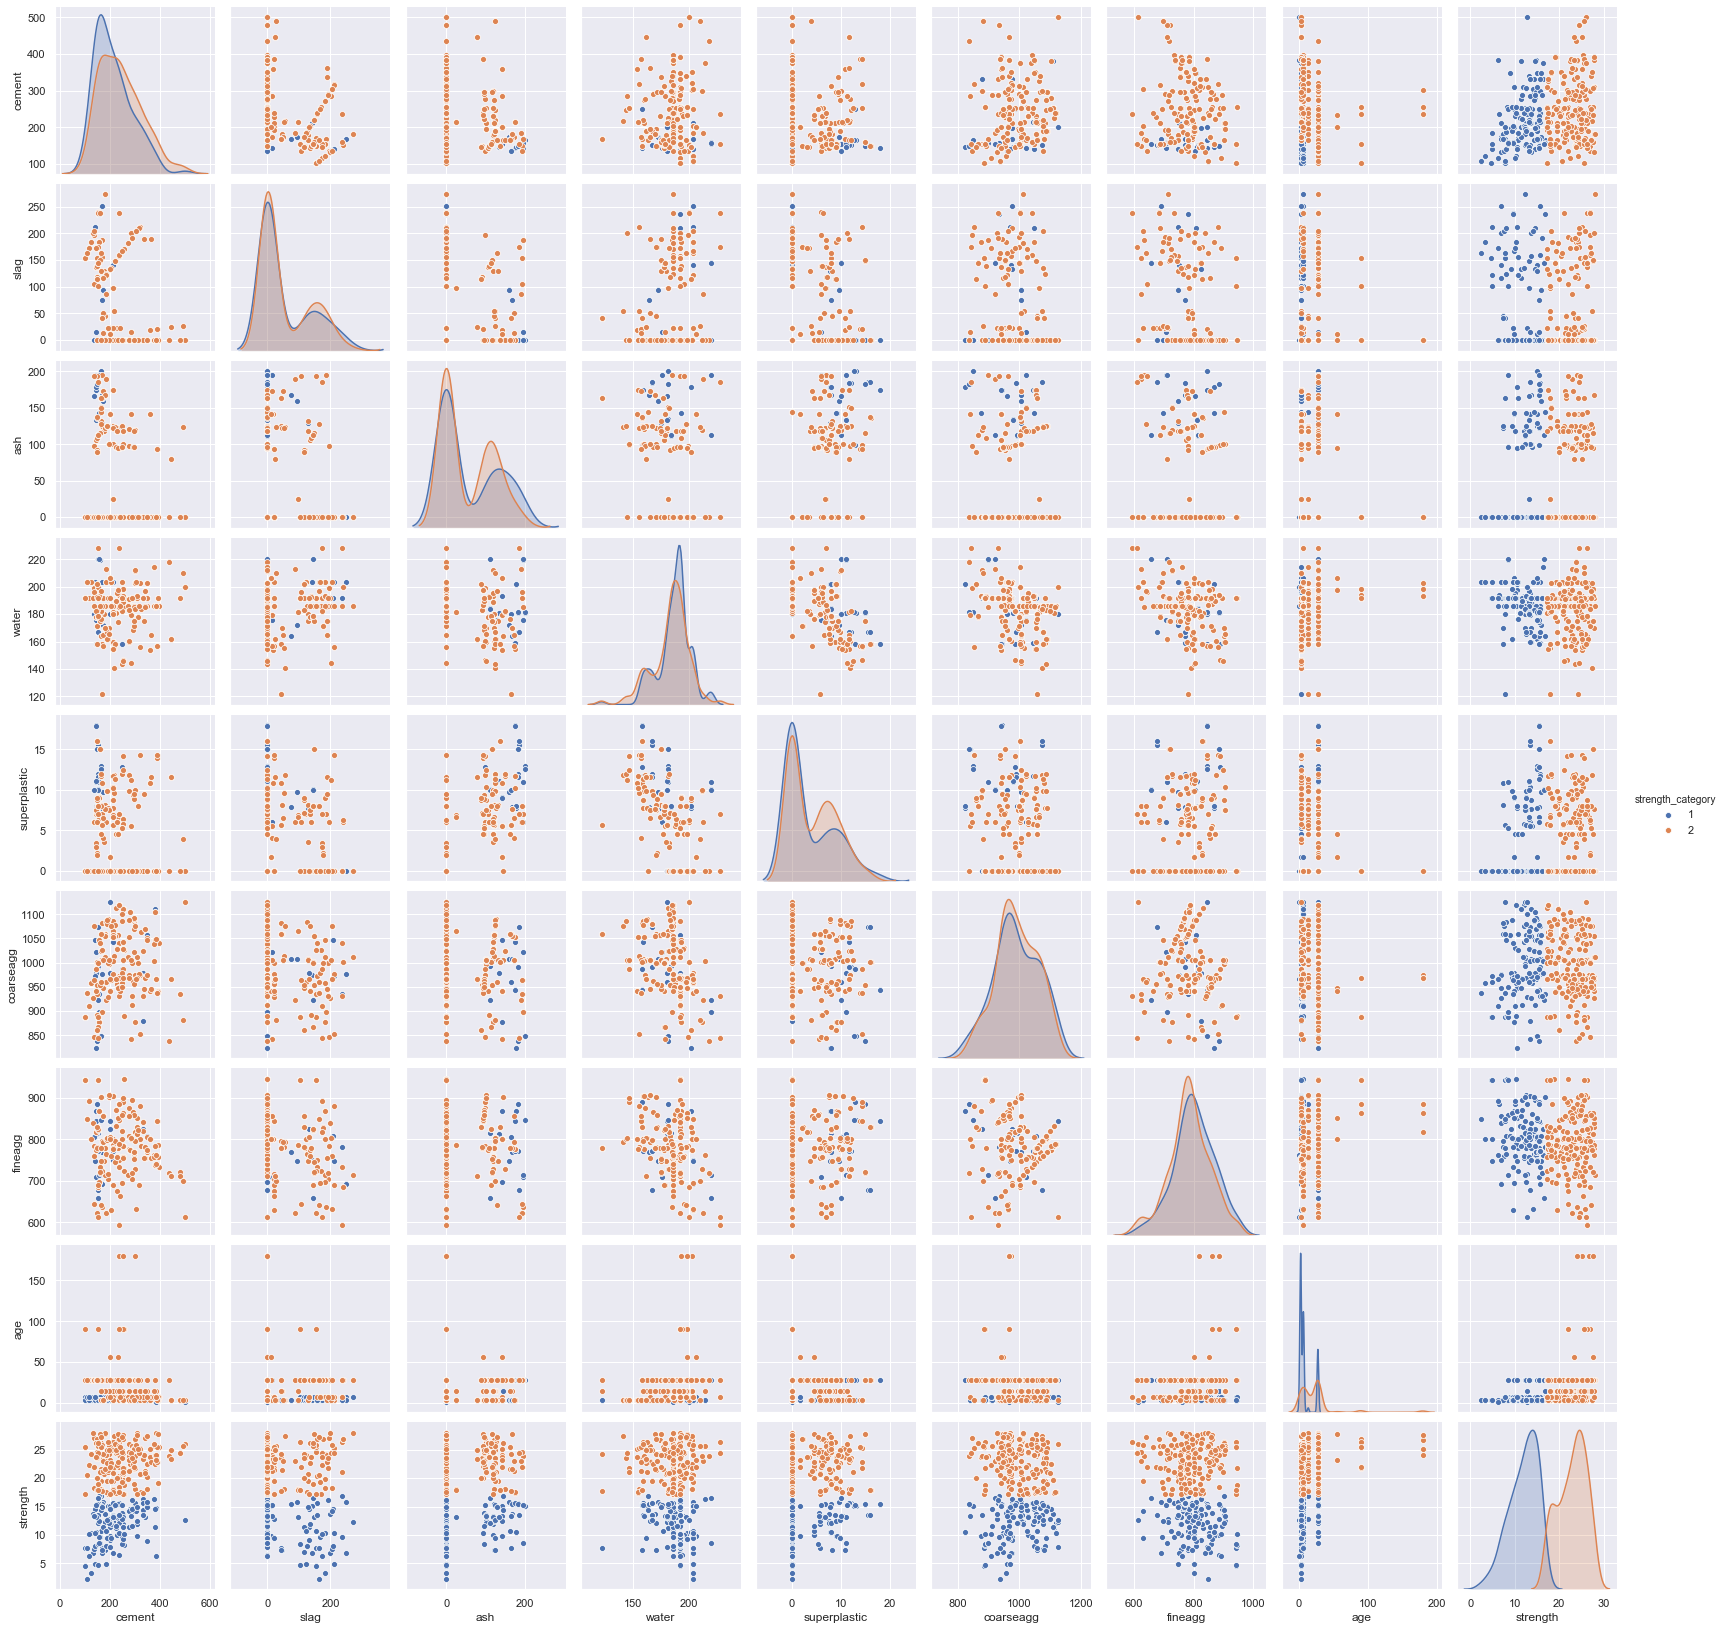

In [120]:
# Pair Plot for Set 1 with categories upto 17 MPa and >17 and <= 28 MPa
sns.pairplot(df1, diag_kind='kde',hue='strength_category')

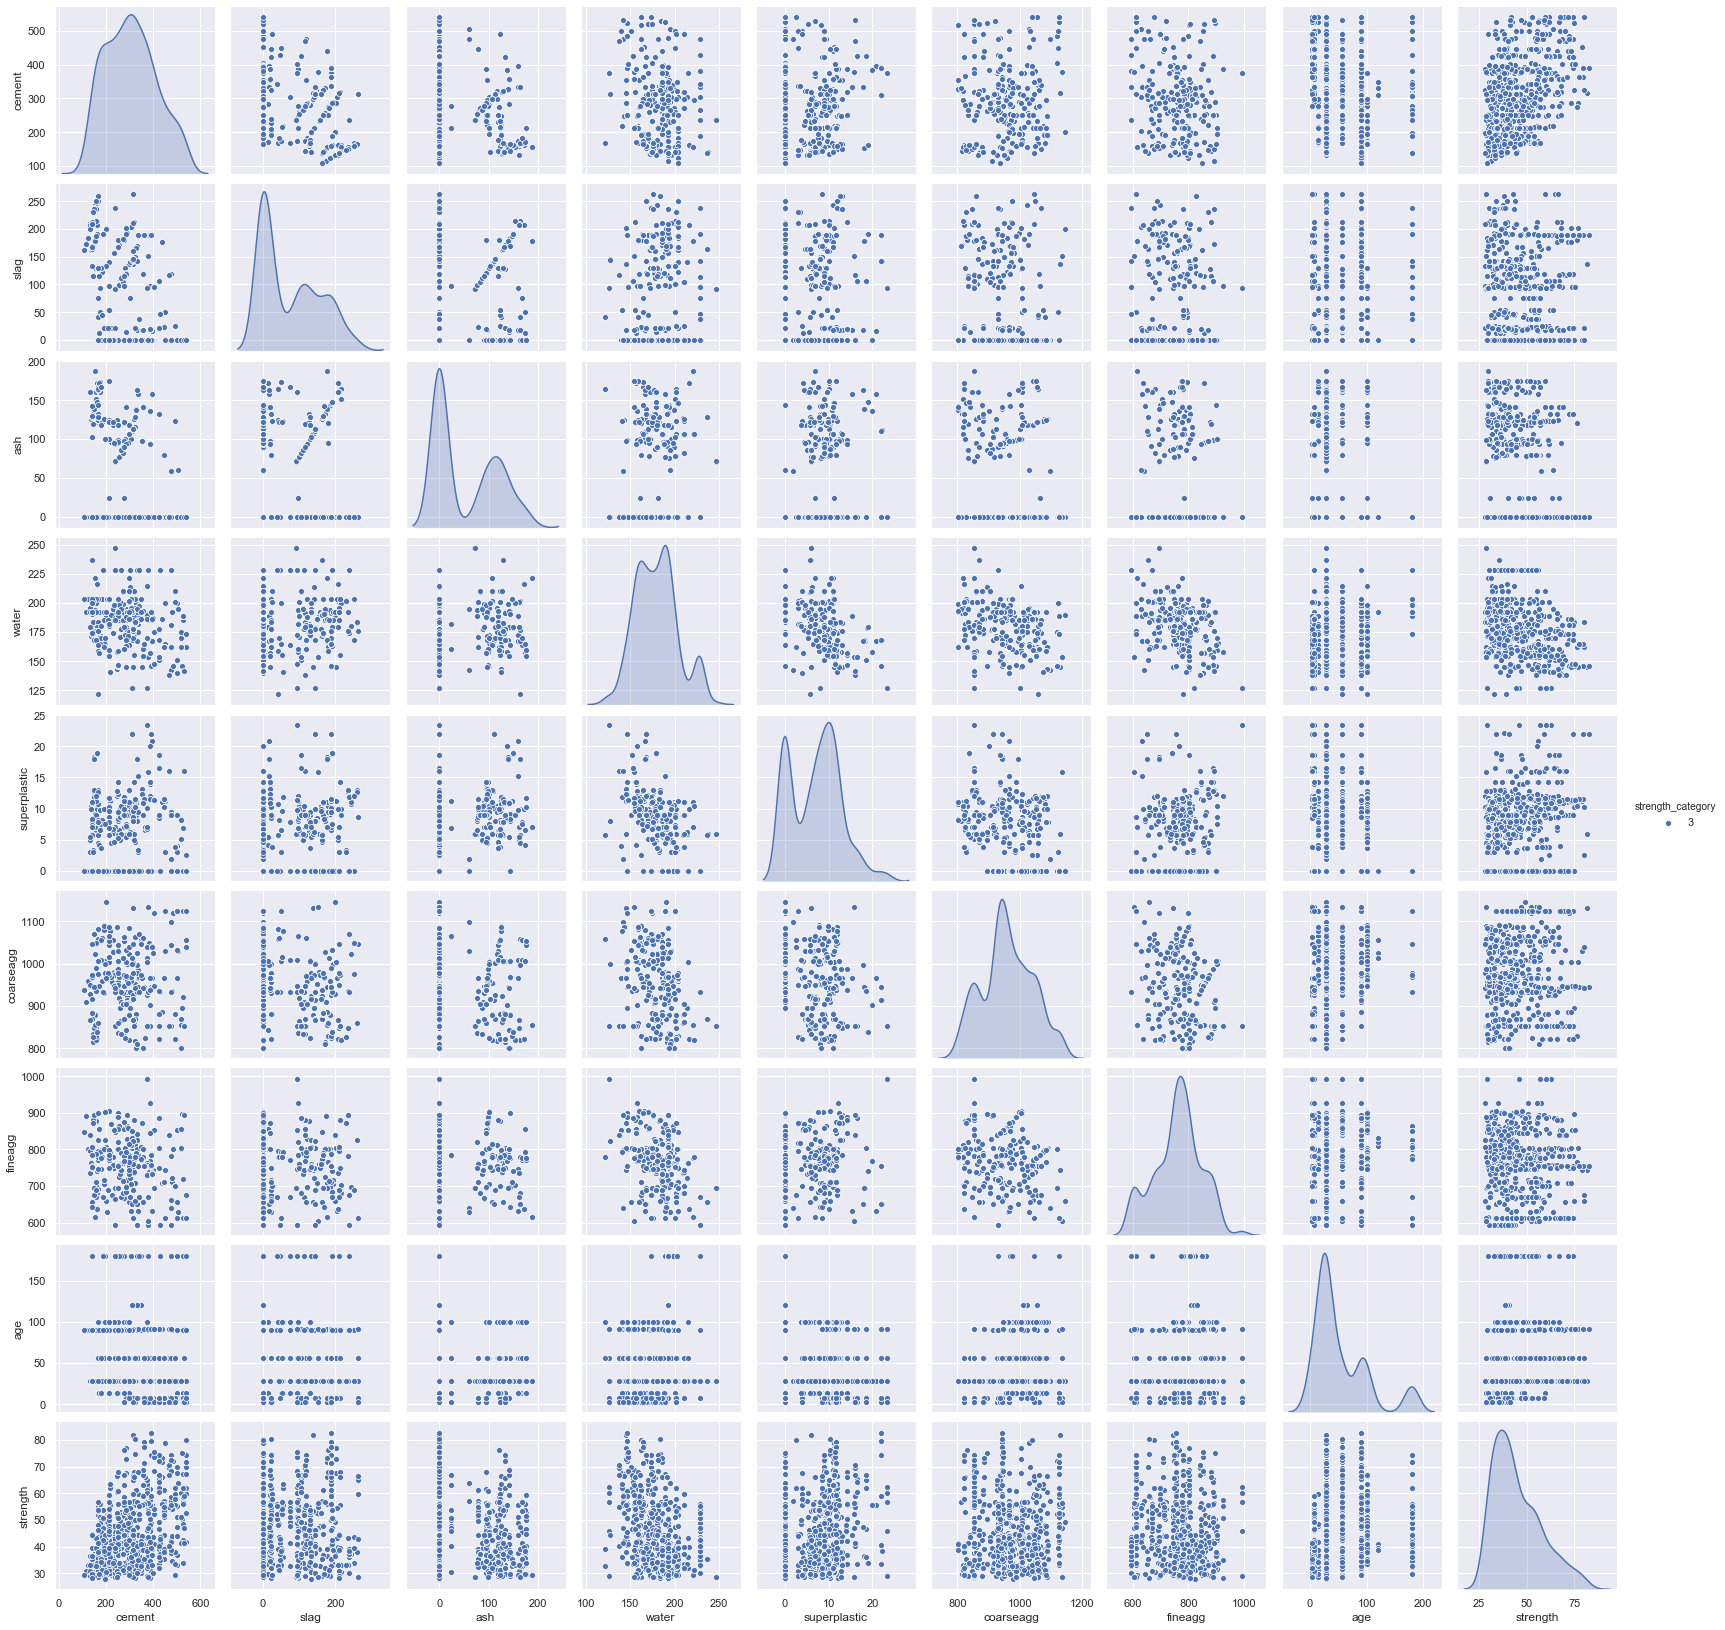

In [121]:
# Pair Plot for Set 2 with category >28 MPa
sns.pairplot(df2, diag_kind='kde',hue='strength_category')

In [122]:
# "Strength" correlation values in descending order for Set 1
correlation_values=df1.corr()['strength']
correlation_values.abs().sort_values(ascending=False)

strength             1.000000
strength_category    0.864169
age                  0.359317
cement               0.241193
fineagg              0.139411
superplastic         0.130397
water                0.121227
ash                  0.052444
coarseagg            0.033506
slag                 0.025216
Name: strength, dtype: float64

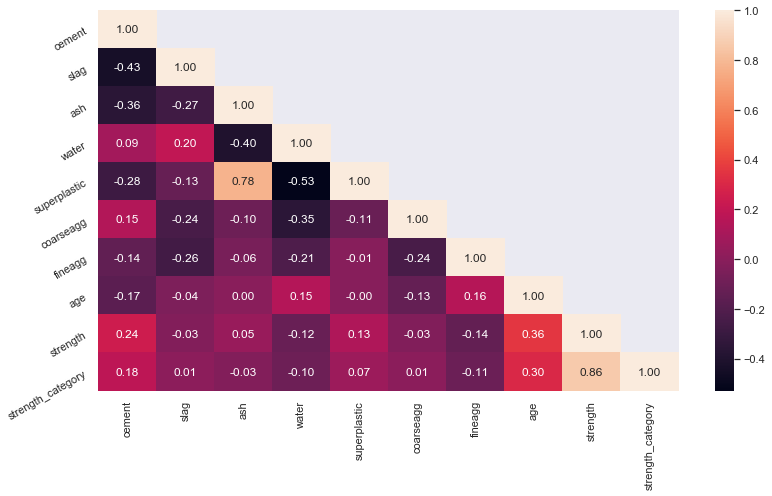

In [123]:
corr = df1.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

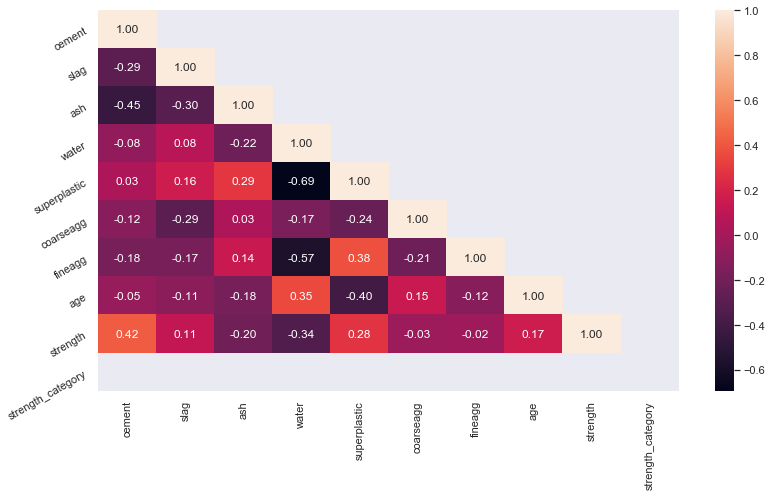

In [124]:
corr = df2.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [125]:
# "Strength" correlation values in descending order for Set 2
correlation_values=df2.corr()['strength']
correlation_values.abs().sort_values(ascending=False)

strength             1.000000
cement               0.422343
water                0.339271
superplastic         0.278009
ash                  0.204021
age                  0.165240
slag                 0.113649
coarseagg            0.034662
fineagg              0.021405
strength_category         NaN
Name: strength, dtype: float64

In [126]:
X1 = df1.drop(['strength','strength_category','ash'], axis=1)
y1 = df1[['strength']]

In [127]:
# Split X and y into training and test set in 70:30 ratio

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.3, random_state = 234)

In [128]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X1_train)
X1_norm = scaler.transform(X1_train)
scaler = Normalizer().fit(X1_test)
X1_test_norm = scaler.transform(X1_test)

In [129]:
regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,max_depth=3, random_state=0, loss='ls')
regressor.fit(X1_norm , y1_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
y1_pred = regressor.predict(X1_test_norm)
# performance on train data
print('Performance on training data using Gradient Boost with Set 1:',regressor.score(X1_norm,y1_train))
# performance on test data
print('Performance on testing data using Gradient Boost with Set 1:',regressor.score(X1_test_norm,y1_test))
#Evaluate the model using accuracy
acc_GB1=metrics.r2_score(y1_test, y1_pred)
print('Accuracy Gradient Boost with Set 1: ',acc_GB1)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using Gradient Boost with Set 1: 0.9997099754889758
Performance on testing data using Gradient Boost with Set 1: 0.8052066057170144
Accuracy Gradient Boost with Set 1:  0.8052066057170144
MSE:  8.70147791620713


In [131]:
X2 = df2.drop(['strength','strength_category','fineagg'], axis=1)
y2 = df2[['strength']]

In [132]:
# Split X and y into training and test set in 70:30 ratio

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3, random_state = 234)

In [133]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X2_train)
X2_norm = scaler.transform(X2_train)
scaler = Normalizer().fit(X2_test)
X2_test_norm = scaler.transform(X2_test)

In [134]:
regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,max_depth=3, random_state=0, loss='ls')
regressor.fit(X2_norm , y2_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [135]:
y2_pred = regressor.predict(X2_test_norm)
# performance on train data
print('Performance on training data using Gradient Boost with Set 2:',regressor.score(X2_norm,y2_train))
# performance on test data
print('Performance on testing data using Gradient Boost with Set 2:',regressor.score(X2_test_norm,y2_test))
#Evaluate the model using accuracy
acc_GB2=metrics.r2_score(y2_test, y2_pred)
print('Accuracy Gradient Boost with Set 1: ',acc_GB2)
print('MSE: ',metrics.mean_squared_error(y2_test, y2_pred))

Performance on training data using Gradient Boost with Set 2: 0.9964410284625784
Performance on testing data using Gradient Boost with Set 2: 0.8414510036780642
Accuracy Gradient Boost with Set 1:  0.8414510036780642
MSE:  25.475299985060612


## Analysis

1. We used DecisionTreeRegressor to check the importance of variable and removing the least important variables. The accuracy of the models was between 59% to 87%. But the models seem to be overfit models as accuracy on training data was higher for almost all iterations.
2. Analysis done with Ridge, LASSO and using polynomial features. The models showed improved result with the polynomial features.
3. GradientBoostingRegressor and RandomForestRegressor were used and both showed better performance of >90%. RandomSearchCV was used to get the best parameters and tune the Gradient Boosting Regressor model.
4. Using KFold, we found the mean accuracy of ~93.8 with standard deviation of 4.44%. 
5. **Model can predict ~84% to ~99% with  confidence level of 95%.**

**Removing Age Variable**     
Tried creating model without the age variable but model accuracy dropped significantly.    
     
**Creating separating models on two datasets for Strength Categories**    
Sliced the datasets in two different sets based on strength categories.     
Though as expected, the prediction of higher class of "strength_category = 3" is better at 84% as compared to prediction     accuracy for Set 1 at ~80%. But overall the accuracy has dropped from the model on complete dataset.     

##                                                       ***** Assignment End ***** 